In [305]:
library('hdp')
library('clusterCrit')
library('grid')
library('gridExtra')
library('ggplot2')
library('ggrepel')
library('RColorBrewer')
library('dplyr')
library('IRdisplay')
source('../../../src/tools.R')     # custom tools function
source('../../../src/hdp_tools.R') # hdp related functions
source('../../../src/hdp_tools_yanis.R')
theme_set(theme_minimal())

# set jupyer notebook parameters
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 200, # set the maximum number of rows displayed
        repr.matrix.max.cols = 200) # set the maximum number of columns displayed


In [56]:
df_final <- read.table("../../../data/updated_dataset/final_clustering.csv",sep = ',' , header = T)
rownames(df_final)<- df_final$X
df_final <- df_final[,-1:-3]

# LET'S LOOK AT THE NEW GRIDSEARCH OPTIMIZED

In [306]:
new_table <- read.table("hdp_gridsearch_new.tsv",sep = '\t' , header = T)

In [307]:
new_table[order(new_table$n_components,decreasing=T),]

chains inicc n   burnin space base_dist  alphaa alphab n_components
37 3      15    350 5000   20    gaussian   1      1      10          
40 3      15    350 7000   20    gaussian   1      1      10          
43 3      15    450 5000   20    gaussian   1      1      10          
46 3      15    450 7000   20    gaussian   1      1      10          
1  3      12    350 5000   20    gaussian   1      1       9          
4  3      12    350 7000   20    gaussian   1      1       9          
7  3      12    450 5000   20    gaussian   1      1       9          
10 3      12    450 7000   20    gaussian   1      1       9          
13 3      13    350 5000   20    gaussian   1      1       9          
16 3      13    350 7000   20    gaussian   1      1       9          
17 3      13    350 7000   20    uniform    1      1       9          
19 3      13    450 5000   20    gaussian   1      1       9          
20 3      13    450 5000   20    uniform    1      1       9          
22 3      13    450 7000   20    gaussian   1      1       9          
23 3      13    450 7000   20    uniform    1      1       9          
25 3      14    350 5000   20    gaussian   1      1       9          
28 3      14    350 7000   20    gaussian   1      1       9          
31 3      14    450 5000   20    gaussian   1      1       9          
34 3      14    450 7000   20    gaussian   1      1       9          
38 3      15    350 5000   20    uniform    1      1       9          
41 3      15    350 7000   20    uniform    1      1       9          
44 3      15    450 5000   20    uniform    1      1       9          
47 3      15    450 7000   20    uniform    1      1       9          
49 4      12    350 5000   20    gaussian   1      1       9          
52 4      12    350 7000   20    gaussian   1      1       9          
55 4      12    450 5000   20    gaussian   1      1       9          
58 4      12    450 7000   20    gaussian   1      1       9          
61 4      13    350 5000   20    gaussian   1      1       9          
64 4      13    350 7000   20    gaussian   1      1       9          
65 4      13    350 7000   20    uniform    1      1       9          
67 4      13    450 5000   20    gaussian   1      1       9          
70 4      13    450 7000   20    gaussian   1      1       9          
71 4      13    450 7000   20    uniform    1      1       9          
85 4      15    350 5000   20    gaussian   1      1       9          
86 4      15    350 5000   20    uniform    1      1       9          
88 4      15    350 7000   20    gaussian   1      1       9          
89 4      15    350 7000   20    uniform    1      1       9          
91 4      15    450 5000   20    gaussian   1      1       9          
94 4      15    450 7000   20    gaussian   1      1       9          
95 4      15    450 7000   20    uniform    1      1       9          
5  3      12    350 7000   20    uniform    1      1       8          
8  3      12    450 5000   20    uniform    1      1       8          
14 3      13    350 5000   20    uniform    1      1       8          
26 3      14    350 5000   20    uniform    1      1       8          
35 3      14    450 7000   20    uniform    1      1       8          
50 4      12    350 5000   20    uniform    1      1       8          
53 4      12    350 7000   20    uniform    1      1       8          
56 4      12    450 5000   20    uniform    1      1       8          
59 4      12    450 7000   20    uniform    1      1       8          
62 4      13    350 5000   20    uniform    1      1       8          
68 4      13    450 5000   20    uniform    1      1       8          
73 4      14    350 5000   20    gaussian   1      1       8          
76 4      14    350 7000   20    gaussian   1      1       8          
79 4      14    450 5000   20    gaussian   1      1       8          
82 4      14    450 7000   20    gaussian   1      1       8          
92 4      15    450 5000   

In [ ]:
summary(new_table$Davies_Bouldin)

In [ ]:
summary(new_table$assignment)

In [ ]:
summary(new_table$component_0)

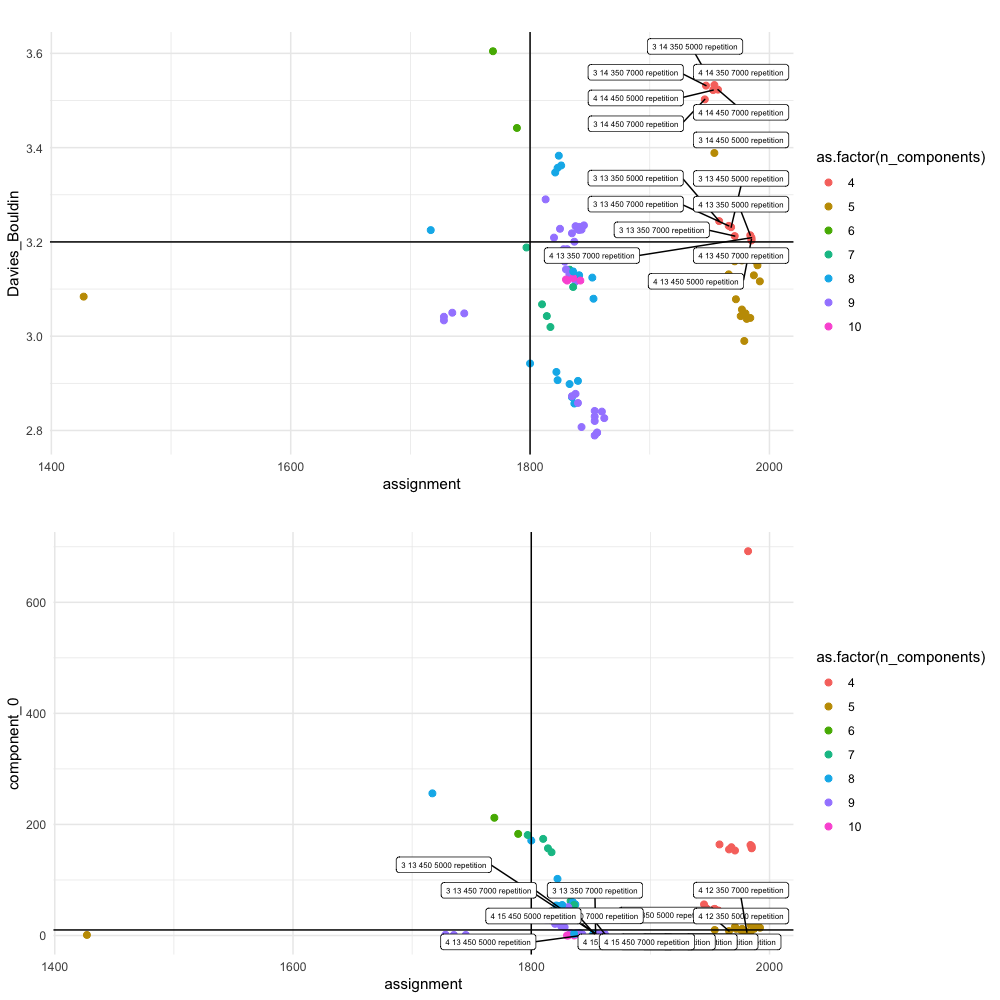

In [60]:
# plot the results of the gridsearch

set_notebook_plot_size(10, 10)

# add labels
#new_table_S_DB <- new_table[new_table$assignment > 1800 & new_table$n_components > 8,]
#new_table_S_DB$good <- ifelse(new_table_S_DB$assignment > 1800 & new_table$n_components > 8, paste(new_table_S_DB$chains,new_table_S_DB$inicc,new_table_S_DB$n,new_table_S_DB$burnin,new_table_S_DB$base_dist),'')

new_table_S_DB <- new_table[new_table$assignment > 1850 & new_table$Davies_Bouldin > 3.2,]
new_table_S_DB$good <- ifelse(new_table_S_DB$assignment > 1850 & new_table_S_DB$Davies_Bouldin > 3.2, paste(new_table_S_DB$chains,new_table_S_DB$inicc,new_table_S_DB$n,new_table_S_DB$burnin,new_table_S_DB$base_dist),'')

new_table_A_0 <- new_table[new_table$assignment > 1850 & new_table$component_0 < 10,]
new_table_A_0$good <- ifelse(new_table_A_0$assignment > 1850 & new_table_A_0$component_0 < 10, paste(new_table_A_0$chains,new_table_A_0$inicc,new_table_A_0$n,new_table_A_0$burnin,new_table_S_DB$base_dist),'')

g1 <- ggplot(new_table) +
        geom_point(aes(x = assignment, y = Davies_Bouldin, col = as.factor(n_components)), size = 2) +
        #scale_color_manual(values=c("red", "orange", "green",'blue',"dark", "orange", "green",'blue',"red", "orange", "green",'blue'), labels = 0:11, name = 'Number of components') +
        ggtitle('') +
        geom_hline(yintercept = 3.2) + #we want higher than 3rd quart
        geom_vline(xintercept = 1800) + #we want higher than 3rd quart
        geom_label_repel(aes(x = assignment, y = Davies_Bouldin, label=good), size=2, data=new_table_S_DB)

g2 <- ggplot(new_table) +
        geom_point(aes(x = assignment, y = component_0, col = as.factor(n_components)), size = 2) +
        #scale_color_manual(values=c("red", "orange", "green",'blue'),labels = 8:11, name = 'Number of components') +
        ggtitle('') +
        geom_hline(yintercept = 10) + #we want lower than 1st quart
        geom_vline(xintercept = 1800) + #we want higher than 3rd quart
        geom_label_repel(aes(x = assignment, y = component_0, label=good), size=2, data=new_table_A_0)

grid.arrange(g1, g2, ncol = 1)


# CLUSTER WITH 10 COMPONENTS THAT WE MIGHT KEEP

### Params: 3 15 350 5000 gaussian

In [136]:
###Binomial
num_cols = ncol(df_final)
bin <- function(x){
    set.seed(123)
  (rbinom(1, num_cols, mean(x))+1)/num_cols
}

###Normal

normal <- function(x){
    set.seed(123)
  abs(rnorm(1,mean(x),sd(x)))
}

###Poisson

poisson <- function(x){
    set.seed(123)
  (rpois(num_cols,1)+1)/num_cols
}

###Uniform equally over all columns

equally <- function(x){
    set.seed(123)
  1/num_cols
}

###Repet 1

repet <- function(x){
    set.seed(123)
  1
}

#sapply(df_gene,equally)
binomial <- unlist(sapply(df_final,bin))
gaussian <- unlist(sapply(df_final,normal))
pois <- as.numeric(unlist(sapply(df_final,poisson)))
unif <- unlist(sapply(df_final,equally))
repetition <- unlist(sapply(df_final,repet))
lists<- list(binomial,gaussian,unif,repetition)
for (lis in lists) {
    initialise_hdp_yanis(data=df_final,alphaa=1,alphab=1,hh=lis)
}

 done!


In [ ]:
hdp <- initialise_hdp_yanis(df_final,hh=gaussian,alphaa = 1,alphab= 1)

In [ ]:
number_of_chains <- 3
chain_list <- vector('list', number_of_chains)

for (i in 1:number_of_chains) {
    seed <- i * 100
    print_and_flush(sprintf('### Experiment %d (seed = %d) ###\n', i, seed))
    
    # run single hdp chain
    chain_list[[i]] <- activate_and_run_hdp(hdp,
                                            initcc = 15,
                                            burnin = 5000,
                                            n      = 350,
                                            space  = 20,
                                            seed   = seed)
    print_and_flush('\n')
}

multi_output <- hdp_multi_chain(chain_list)
multi_output

Extract HDP components from posterior sampling
  → extract components... done!
* 10 components found


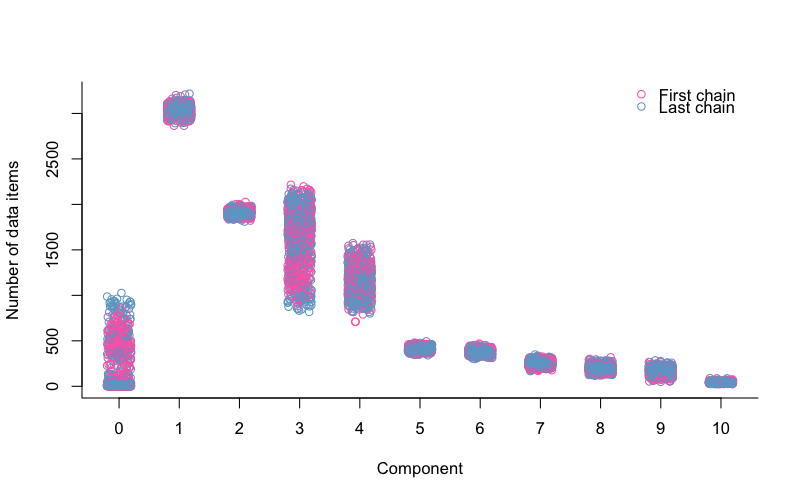

In [64]:
multi_output_cluster_10 <- extract_components(multi_output)
plot_components_size(multi_output_cluster_10)

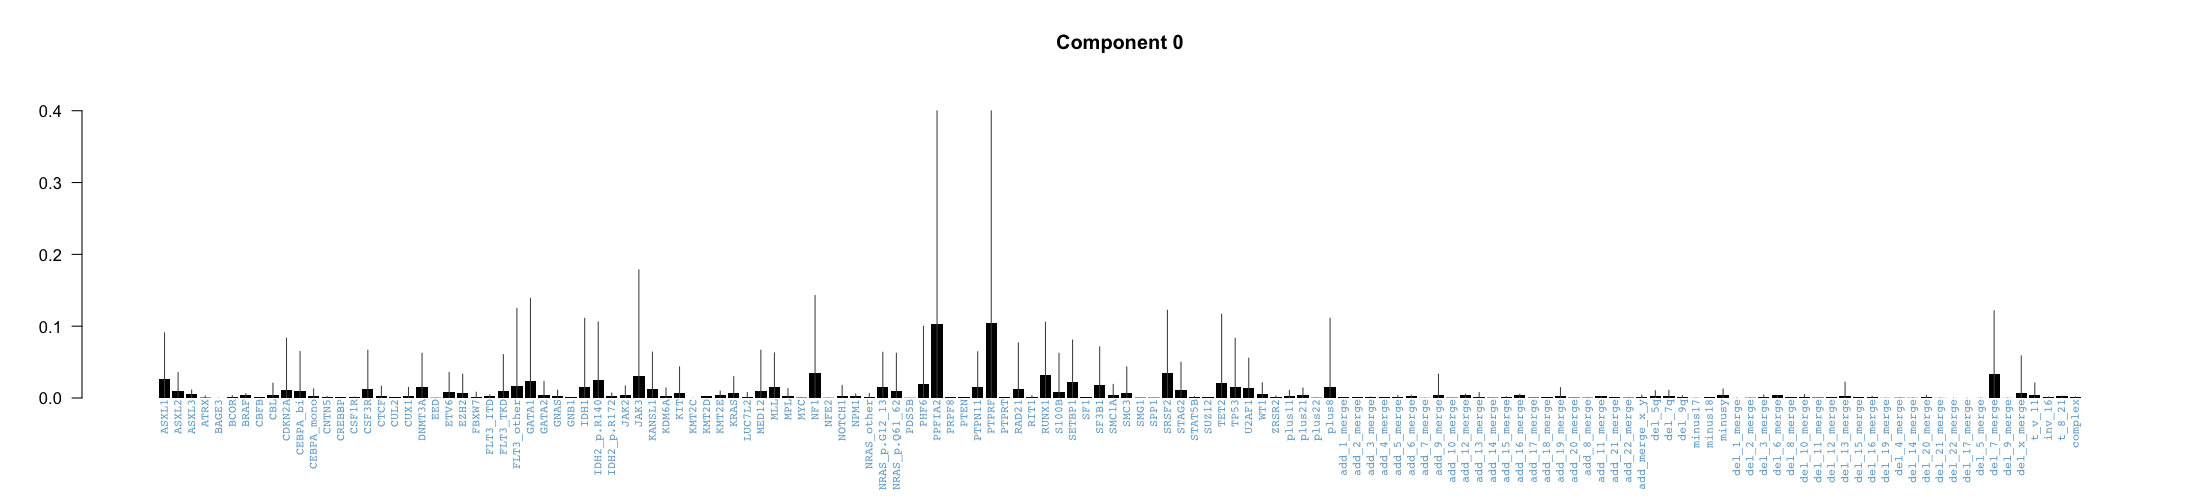

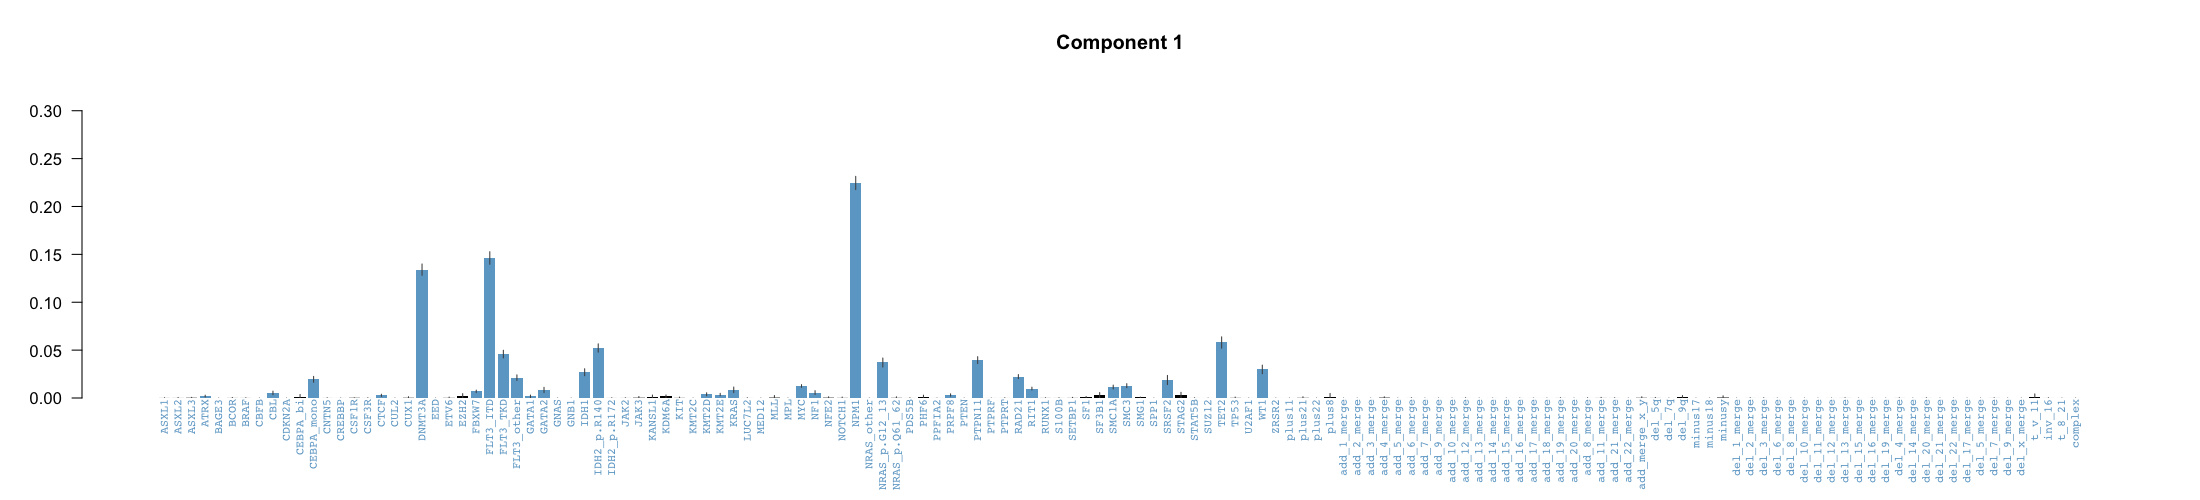

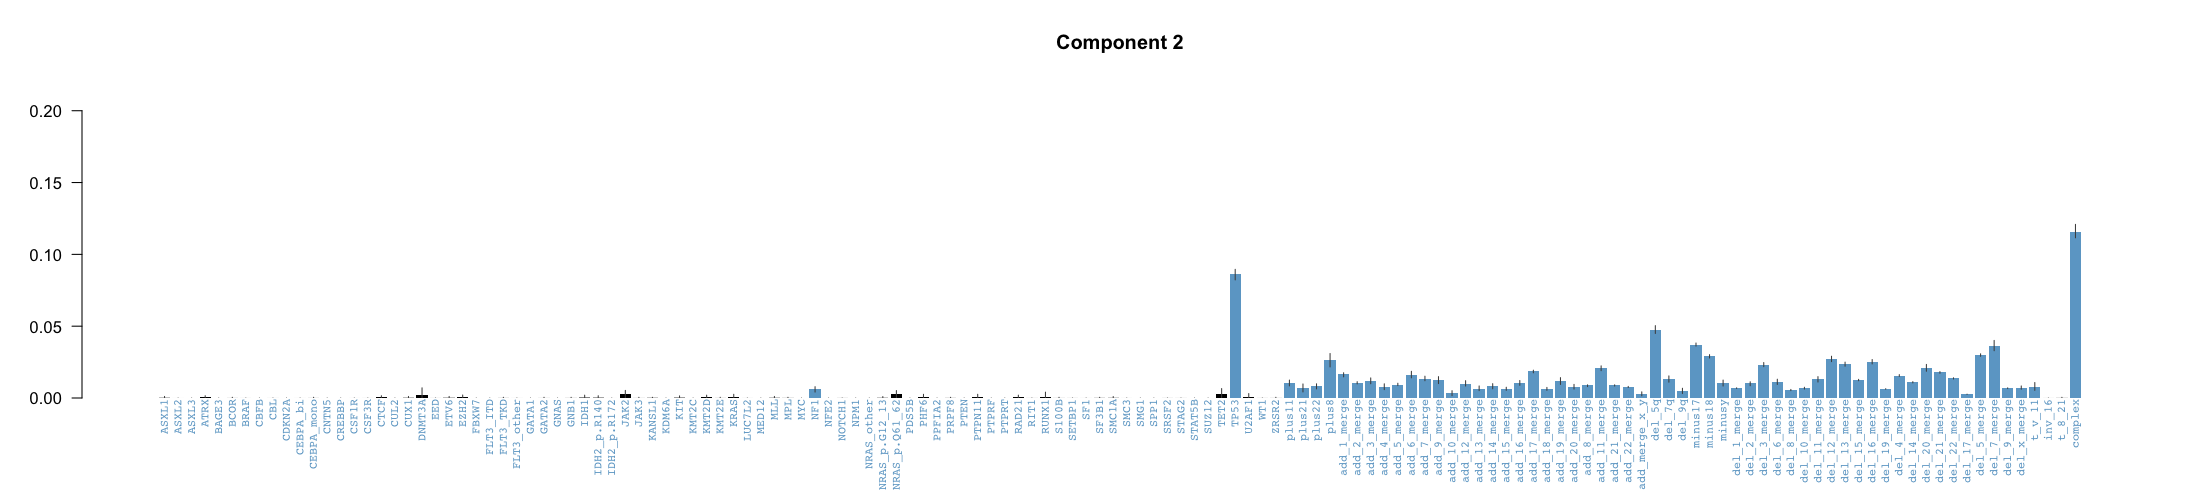

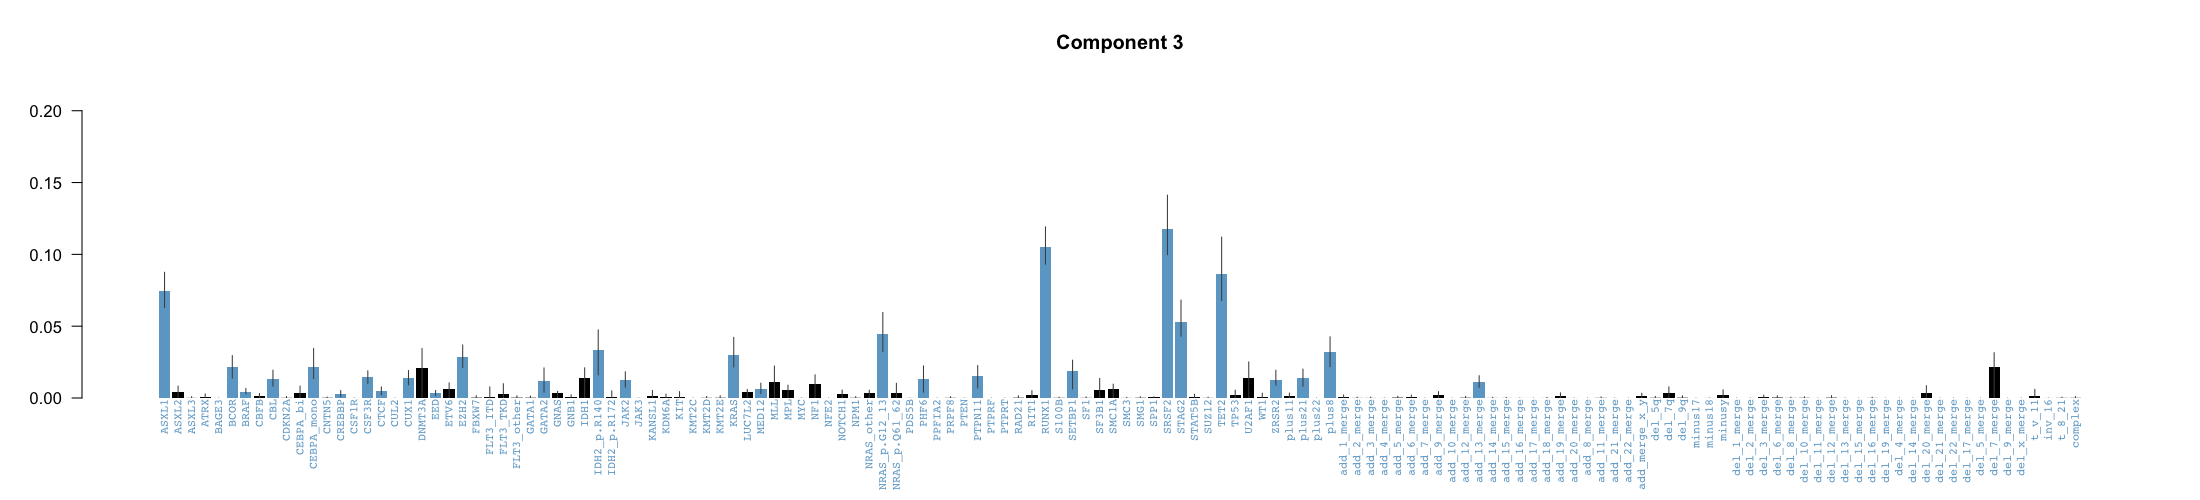

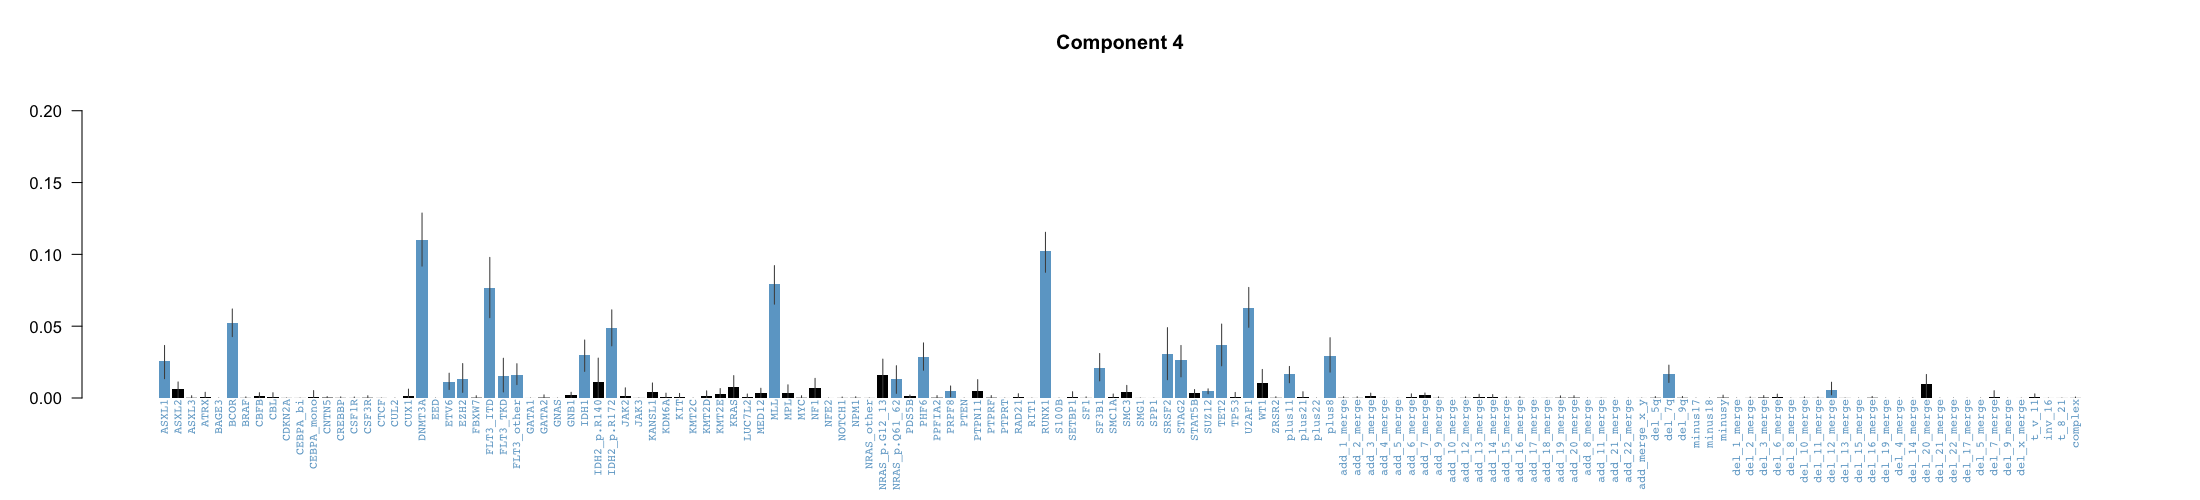

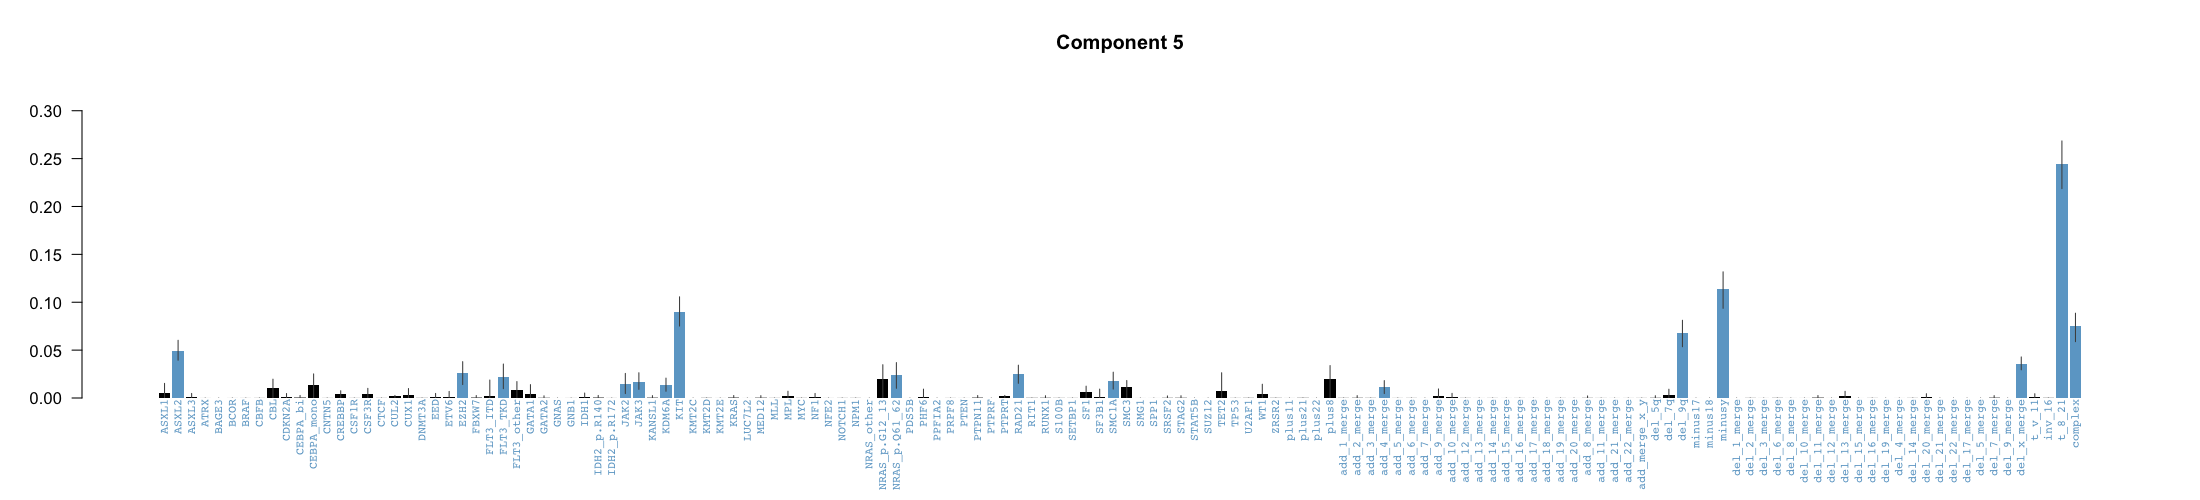

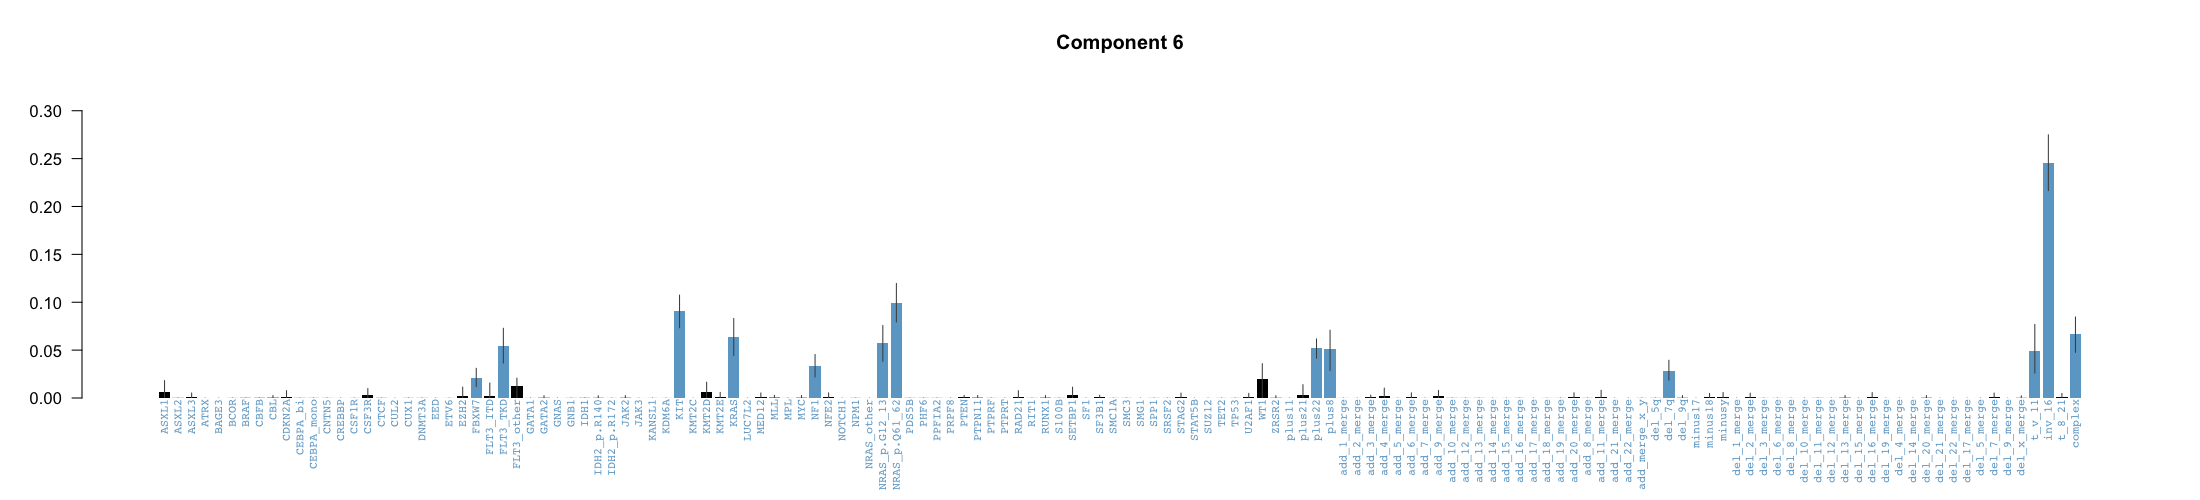

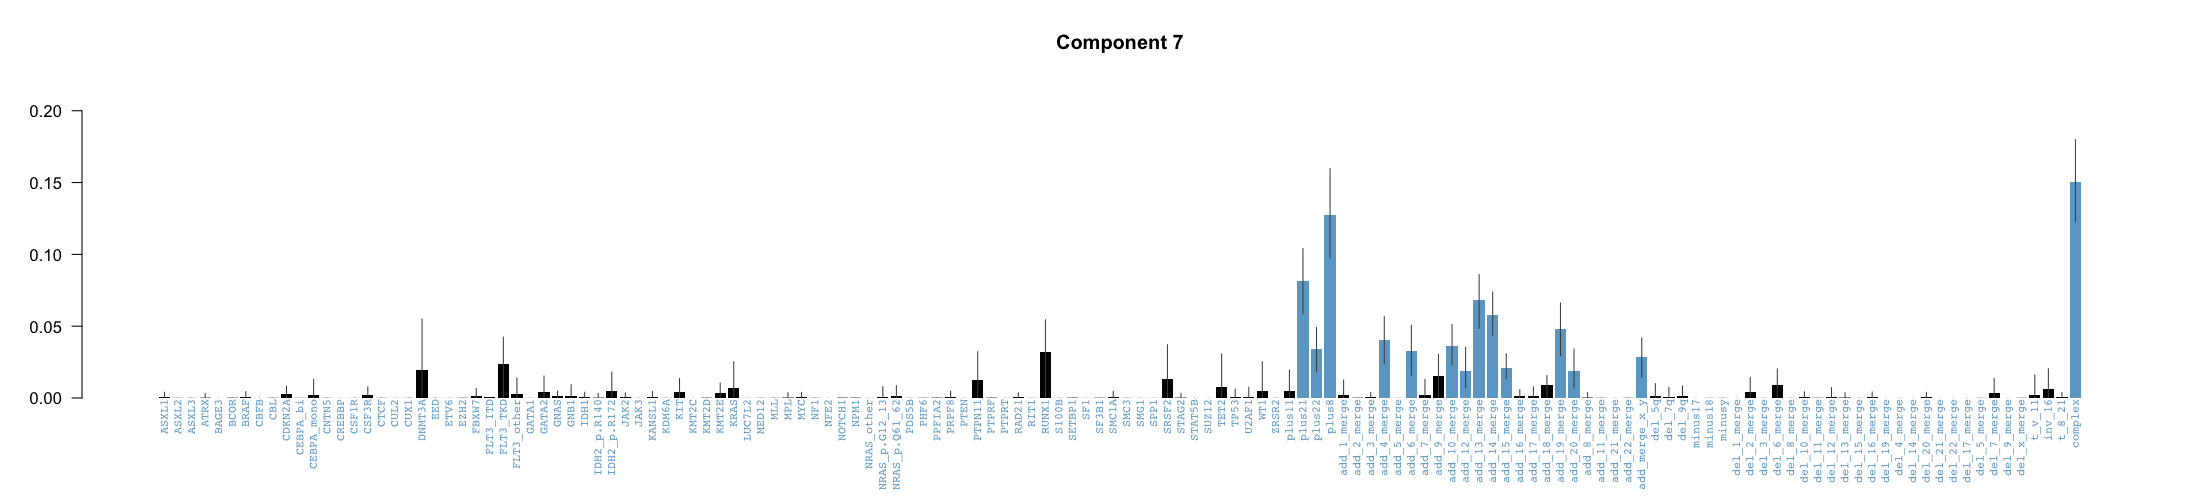

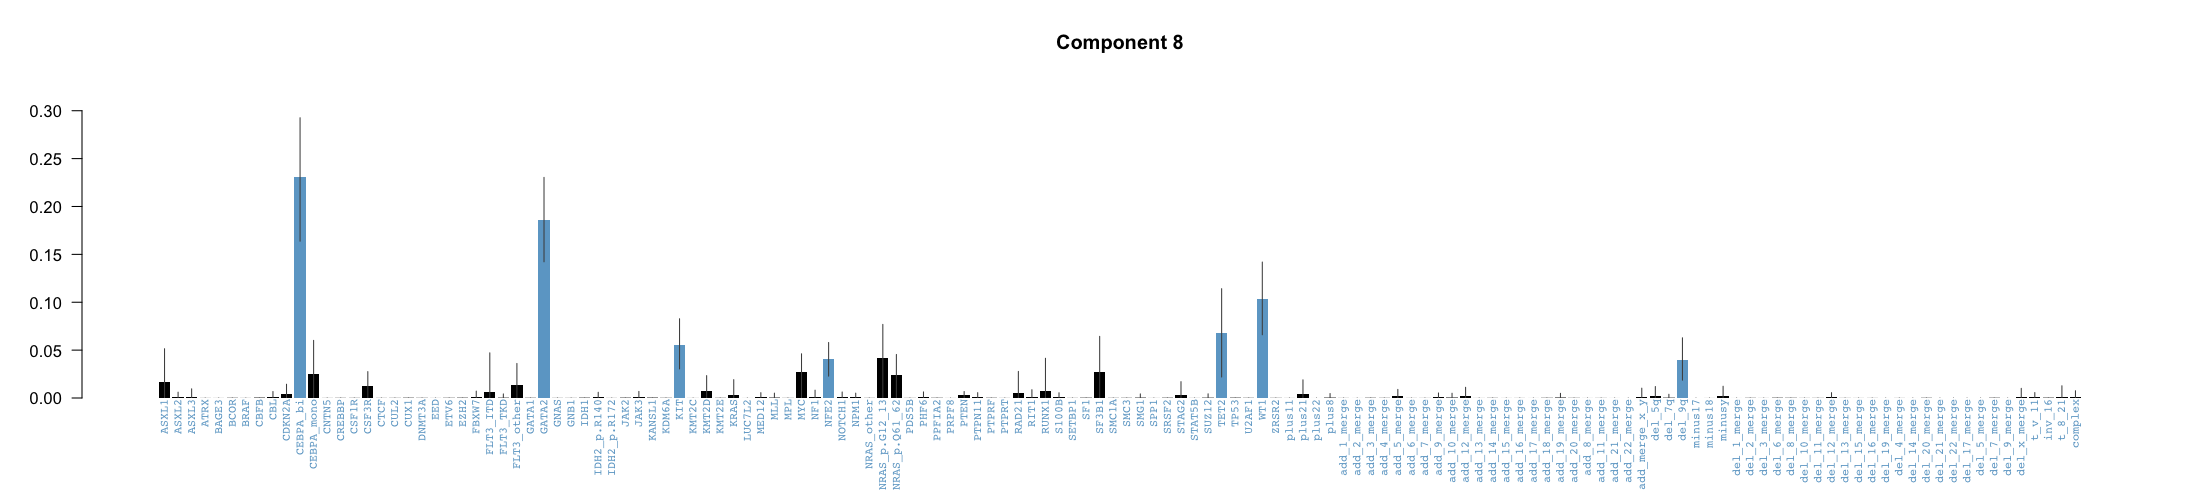

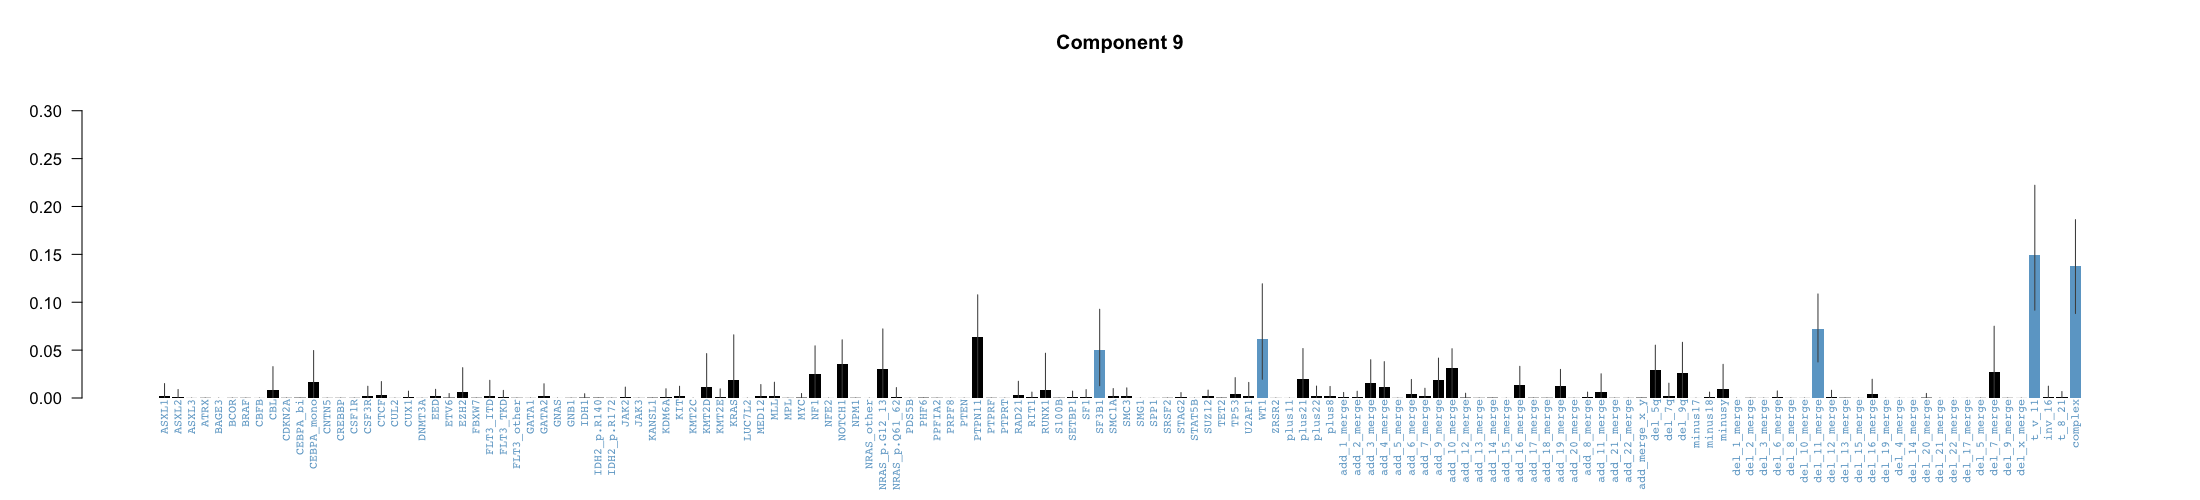

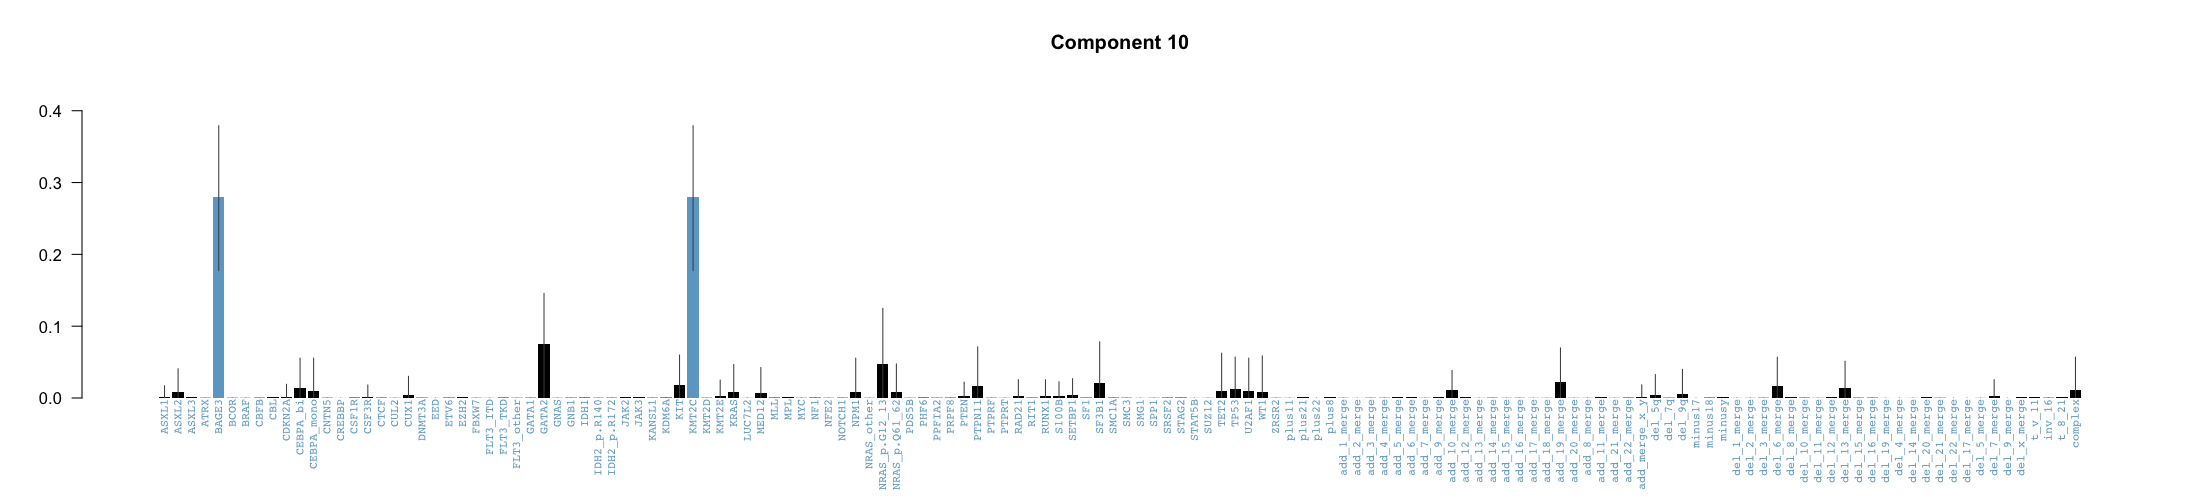

In [65]:
plot_category_distribution_by_component(multi_output_cluster_10, colnames(df_final))

In [66]:
dd_predicted_10_components <- get_prediction_result_dataframe(multi_output_cluster_10, df_final)
get_table(dd_predicted_10_components[,'predicted_component'])

Number of components: 10
Number of NA rows   : 62


values      count freq             
1  1            842  39.1627906976744 
3  3            389  18.093023255814  
4  4            278  12.9302325581395 
2  2            230  10.6976744186047 
6  6            116  5.3953488372093  
5  5            113  5.25581395348837 
11 NaN           62  2.88372093023256 
8  8             49  2.27906976744186 
7  7             34  1.58139534883721 
9  9             30  1.3953488372093  
10 10             7  0.325581395348837
12 -- total -- 2150  100%

# Elli's request to look at the patients not belonging in cluster 2,5,6,7,9

In [ ]:
df_clustered <- cbind(df_final, dd_predicted_10_components)

Let's look at when there is na in this dataframe: we should have 62 rows with na coming from the nas of the assignment in the clusters predictions

In [68]:
length(which(is.na(df_clustered[,143]), arr.ind=TRUE))

[1] 62

## Keep only people belonging to clusters 1,3,4,8,10 and remove columns that we do not need

In [12]:
df_few_clustered <- df_clustered[df_clustered$predicted_component == 1 | df_clustered$predicted_component == 3 | df_clustered$predicted_component == 4 | df_clustered$predicted_component == 8 | df_clustered$predicted_component == 10,]
dim(df_few_clustered) # dim a =sum(comp1,3,4,8,10)
df_few_clustered <- df_few_clustered[,1:142]
dim(df_few_clustered[,1:142] )

[1] 1565  155

[1] 1565  142

Keep only the components to use

#### Let's delete also those features as they are all 0 in the whole subdataset

In [13]:
name <- as.vector(rownames(data.frame(colSums(df_few_clustered[,(colSums(df_few_clustered))==0]))))
name
df_few_clustered[name] <- list(NULL)
dim(df_few_clustered)

[1] "CUL2"         "PTPRT"        "add_22_merge" "minus17"      "del_1_merge" 
 [6] "del_15_merge" "del_19_merge" "del_14_merge" "del_21_merge" "del_22_merge"
[11] "del_17_merge" "del_5_merge"  "del_9_merge"  "del_x_merge"  "inv_16"

[1] 1565  127

## Gridsearch to look at the clusters with this reduced dataset

In [112]:
###Binomial
num_cols = ncol(df_few_clustered)
bin <- function(x){
    set.seed(123)
  (rbinom(1, num_cols, mean(x))+1)/num_cols
}

###Normal

normal <- function(x){
    set.seed(234)
  abs(rnorm(1,mean(x),sd(x)))
}

###Poisson

poisson <- function(x){
    set.seed(123)
  (rpois(num_cols,1)+1)/num_cols
}

###Uniform equally over all columns

equally <- function(x){
    set.seed(123)
  1/num_cols
}

###Repet 1

repet <- function(x){
    set.seed(123)
  1
}

#sapply(df_gene,equally)
binomial <- unlist(sapply(df_few_clustered,bin))
gaussian <- unlist(sapply(df_few_clustered,normal))
pois <- as.numeric(unlist(sapply(df_few_clustered,poisson)))
unif <- unlist(sapply(df_few_clustered,equally))
repetition <- unlist(sapply(df_few_clustered,repet))

In [ ]:
res_few <- hdp_gridsearch_yanis(data, posterior_samples, initial_clusters, burnin, chains, space,base_dist,alphaa,alphab)

In [106]:
new_table <- read.table("hdp_gridsearch_few_cluster.tsv",sep = '\t' , header = T)

In [107]:
new_table[order(new_table$n_components),]

chains inicc n   burnin space base_dist alphaa alphab n_components
3  3       5    450 5000   20    gaussian  1      1      5           
10 3      15    350 5000   20    uniform   1      1      5           
1  3       5    350 5000   20    gaussian  1      1      6           
5  3      10    350 5000   20    gaussian  1      1      6           
6  3      10    350 5000   20    uniform   1      1      6           
7  3      10    450 5000   20    gaussian  1      1      6           
8  3      10    450 5000   20    uniform   1      1      6           
9  3      15    350 5000   20    gaussian  1      1      6           
11 3      15    450 5000   20    gaussian  1      1      6           
12 3      15    450 5000   20    uniform   1      1      6           
2  3       5    350 5000   20    uniform   1      1      7           
4  3       5    450 5000   20    uniform   1      1      7           
   component_0 assignment Davies_Bouldin Silhouette
3  259         1304       3.790631       0.05702056
10  54         1262       3.644369       0.06105391
1  165         1285       3.662061       0.07043223
5  104         1331       3.420257       0.06957403
6   81         1282       3.060158              NaN
7   99         1329       3.423129       0.06962064
8   75         1274       3.057304              NaN
9  386         1311       3.535815       0.06023948
11 379         1313       3.539606       0.06006446
12  69         1261       3.007575              NaN
2   31         1295       2.653766              NaN
4   33         1300       2.665163              NaN

In [ ]:
print(summary(new_table$Davies_Bouldin))
print(summary(new_table$Silhouette))
print(summary(new_table$assignment))
print(summary(new_table$component_0))

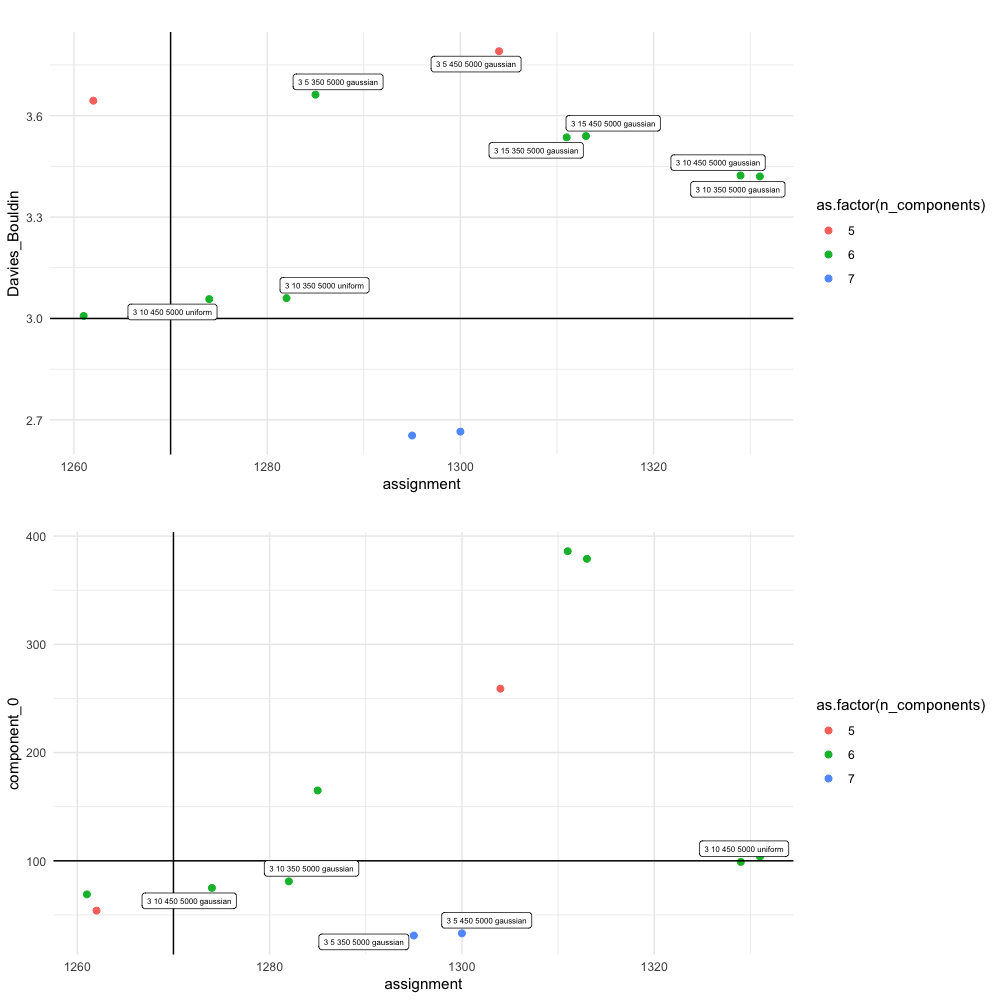

In [110]:
set_notebook_plot_size(10, 10)

# add labels
#new_table_S_DB <- new_table[new_table$assignment > 1800 & new_table$n_components > 8,]
#new_table_S_DB$good <- ifelse(new_table_S_DB$assignment > 1800 & new_table$n_components > 8, paste(new_table_S_DB$chains,new_table_S_DB$inicc,new_table_S_DB$n,new_table_S_DB$burnin,new_table_S_DB$base_dist),'')

new_table_S_DB <- new_table[new_table$assignment > 1270 & new_table$Davies_Bouldin > 3,]
new_table_S_DB$good <- ifelse(new_table_S_DB$assignment > 1270 & new_table_S_DB$Davies_Bouldin > 3, paste(new_table_S_DB$chains,new_table_S_DB$inicc,new_table_S_DB$n,new_table_S_DB$burnin,new_table_S_DB$base_dist),'')

new_table_A_0 <- new_table[new_table$assignment > 1270 & new_table$component_0 < 100,]
new_table_A_0$good <- ifelse(new_table_A_0$assignment > 1270 & new_table_A_0$component_0 < 100, paste(new_table_A_0$chains,new_table_A_0$inicc,new_table_A_0$n,new_table_A_0$burnin,new_table_S_DB$base_dist),'')

g1 <- ggplot(new_table) +
        geom_point(aes(x = assignment, y = Davies_Bouldin, col = as.factor(n_components)), size = 2) +
        #scale_color_manual(values=c("red", "orange", "green",'blue',"dark", "orange", "green",'blue',"red", "orange", "green",'blue'), labels = 0:11, name = 'Number of components') +
        ggtitle('') +
        geom_hline(yintercept = 3) + #we want higher than 3rd quart
        geom_vline(xintercept = 1270) + #we want higher than 3rd quart
        geom_label_repel(aes(x = assignment, y = Davies_Bouldin, label=good), size=2, data=new_table_S_DB)

g2 <- ggplot(new_table) +
        geom_point(aes(x = assignment, y = component_0, col = as.factor(n_components)), size = 2) +
        #scale_color_manual(values=c("red", "orange", "green",'blue'),labels = 8:11, name = 'Number of components') +
        ggtitle('') +
        geom_hline(yintercept = 100) + #we want lower than 1st quart
        geom_vline(xintercept = 1270) + #we want higher than 3rd quart
        geom_label_repel(aes(x = assignment, y = component_0, label=good), size=2, data=new_table_A_0)

grid.arrange(g1, g2, ncol = 1)

## Let's look at the HDP results for the good ones :

### I- First one with 5 components

### 3 5 450 5000 gaussian

In [ ]:
hdp <- initialise_hdp_yanis(df_few_clustered,hh=gaussian,alphaa = 1,alphab= 1)

In [ ]:
number_of_chains <- 3
chain_list <- vector('list', number_of_chains)

for (i in 1:number_of_chains) {
    seed <- i * 100
    print_and_flush(sprintf('### Experiment %d (seed = %d) ###\n', i, seed))
    
    # run single hdp chain
    chain_list[[i]] <- activate_and_run_hdp(hdp,
                                            initcc = 5,
                                            burnin = 5000,
                                            n      = 450,
                                            space  = 20,
                                            seed   = seed)
    print_and_flush('\n')
}

multi_output <- hdp_multi_chain(chain_list)
multi_output

Extract HDP components from posterior sampling
  → extract components... done!
* 5 components found


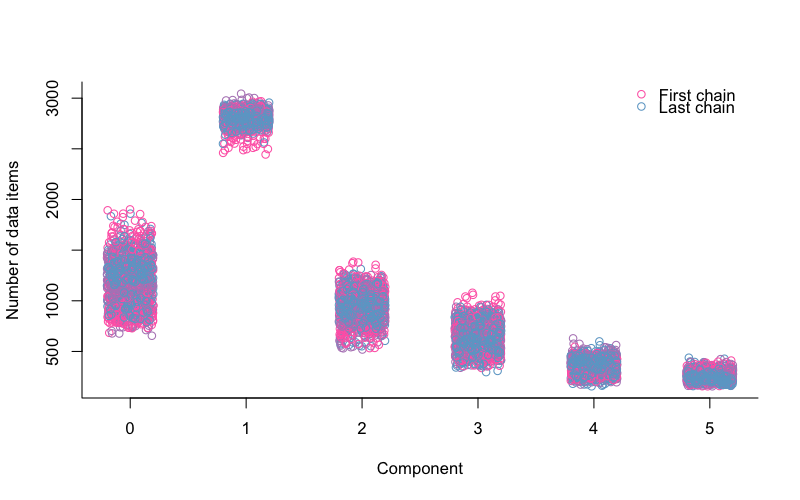

In [46]:
multi_output_5_components <- extract_components(multi_output)
plot_components_size(multi_output_5_components)

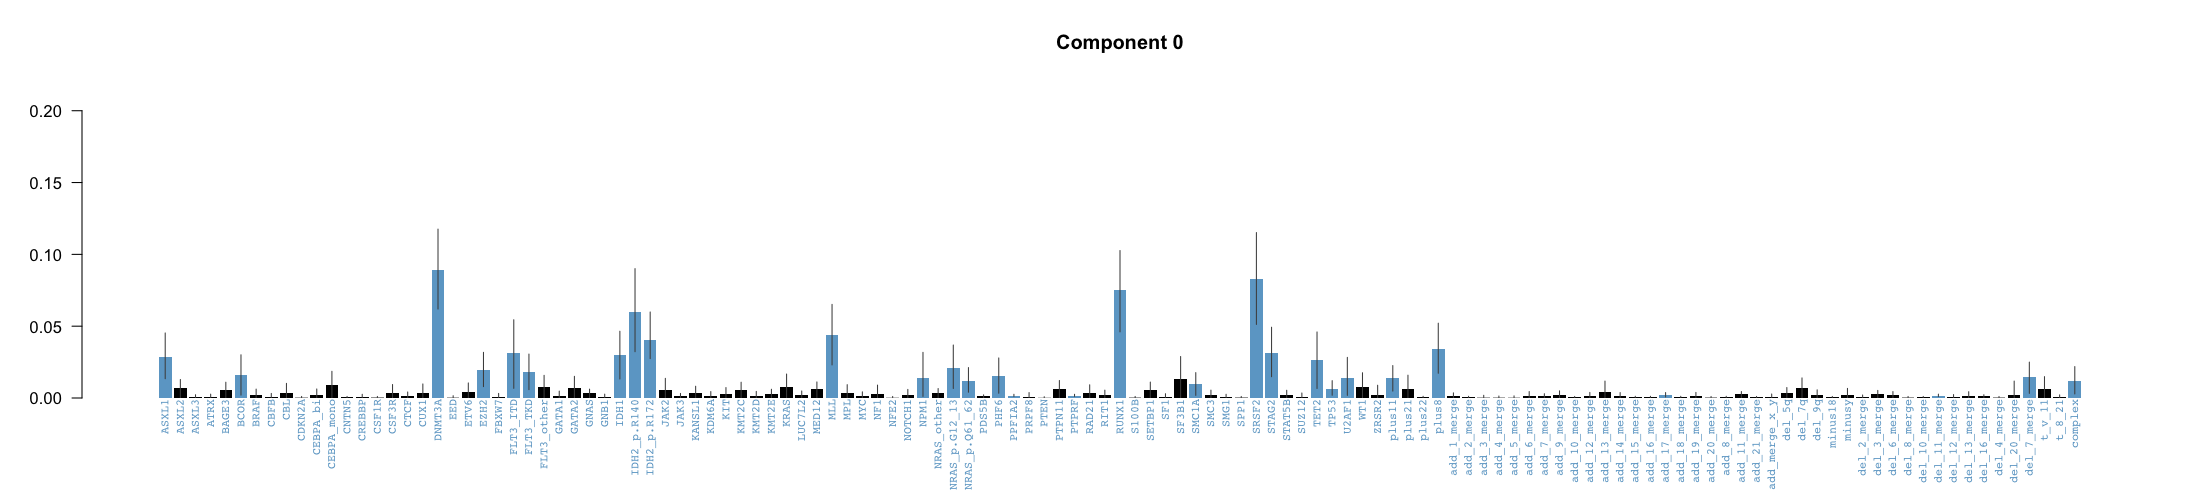

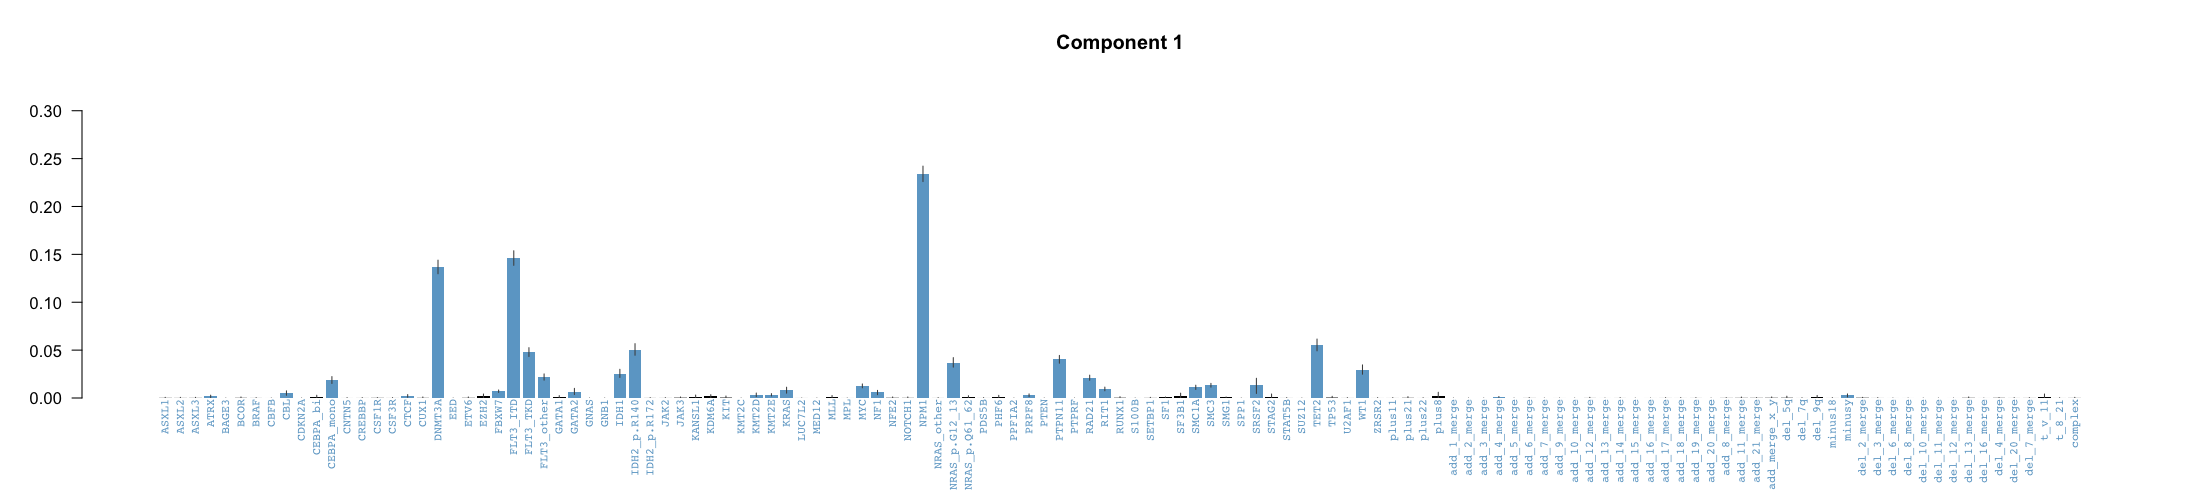

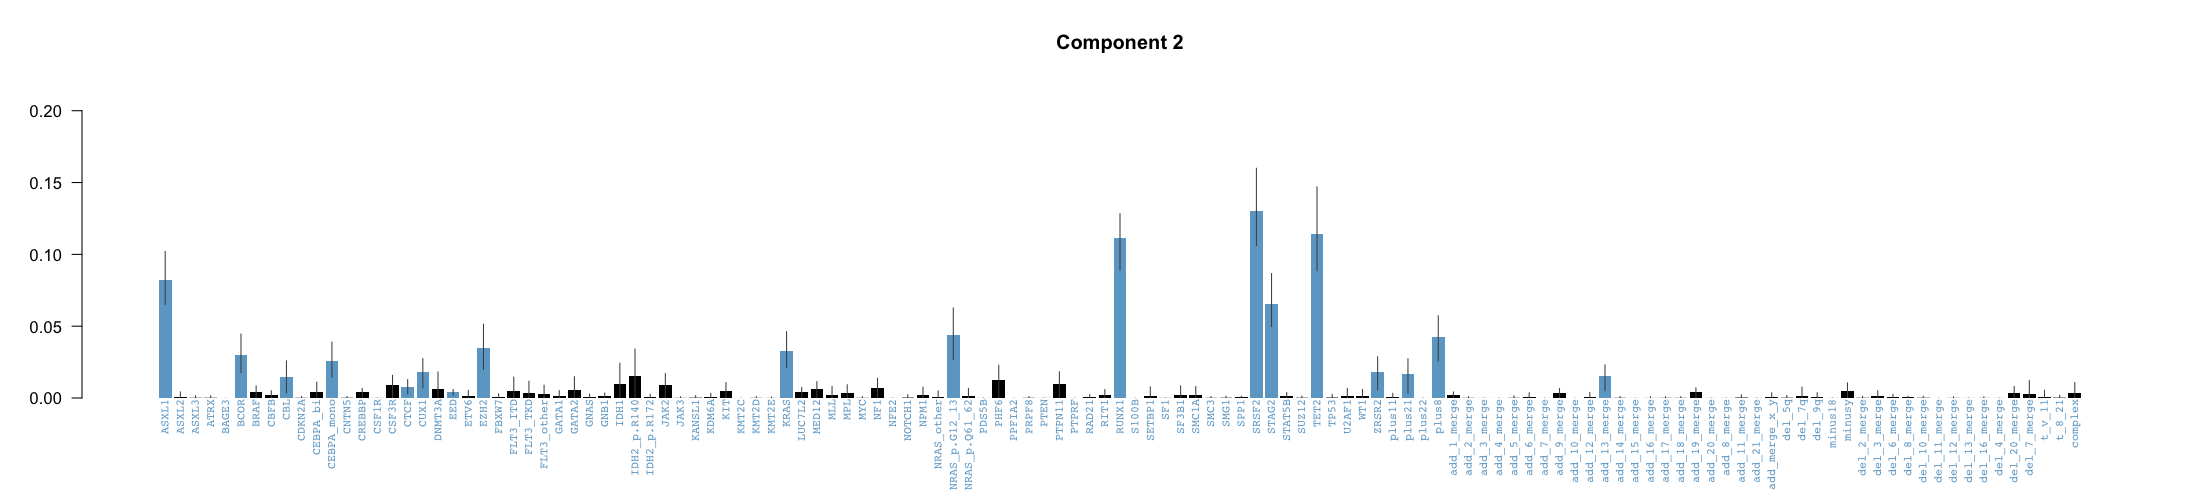

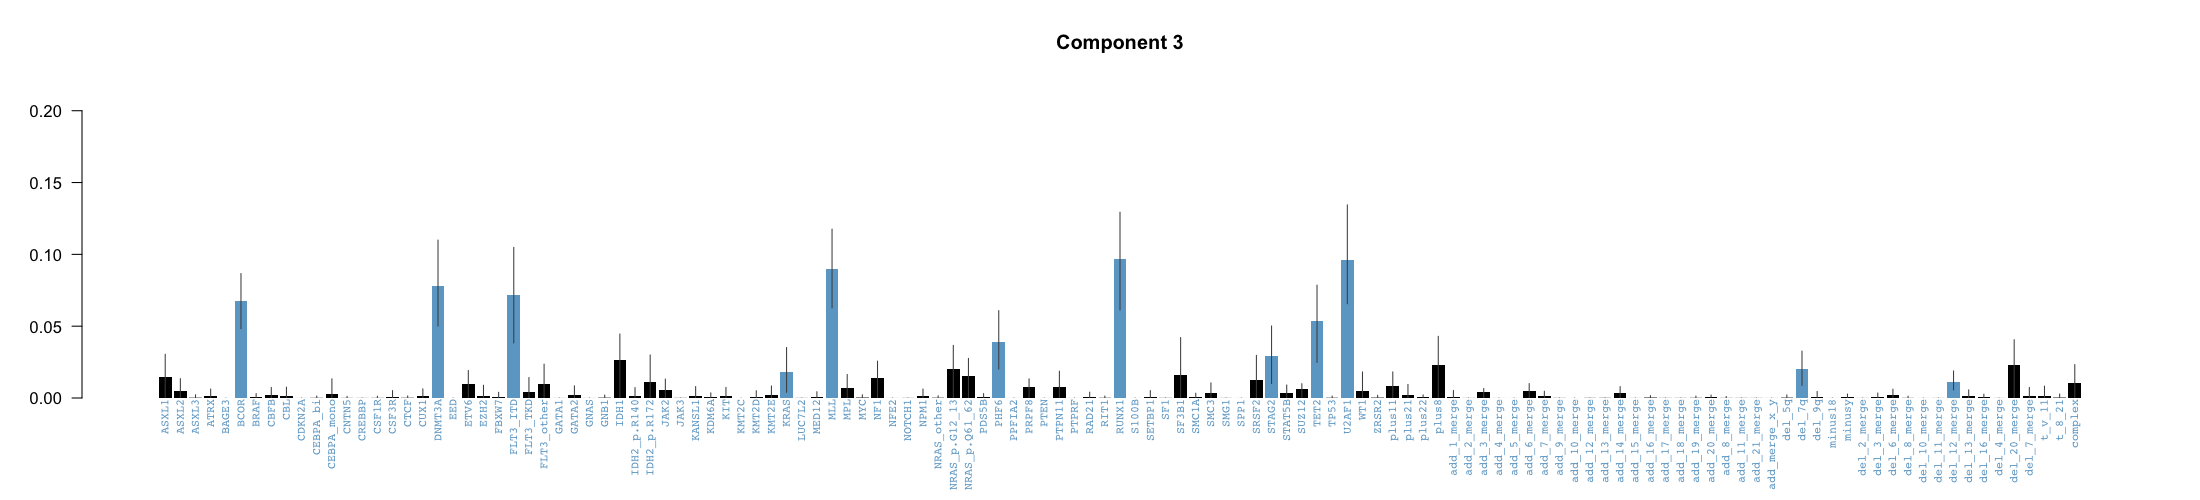

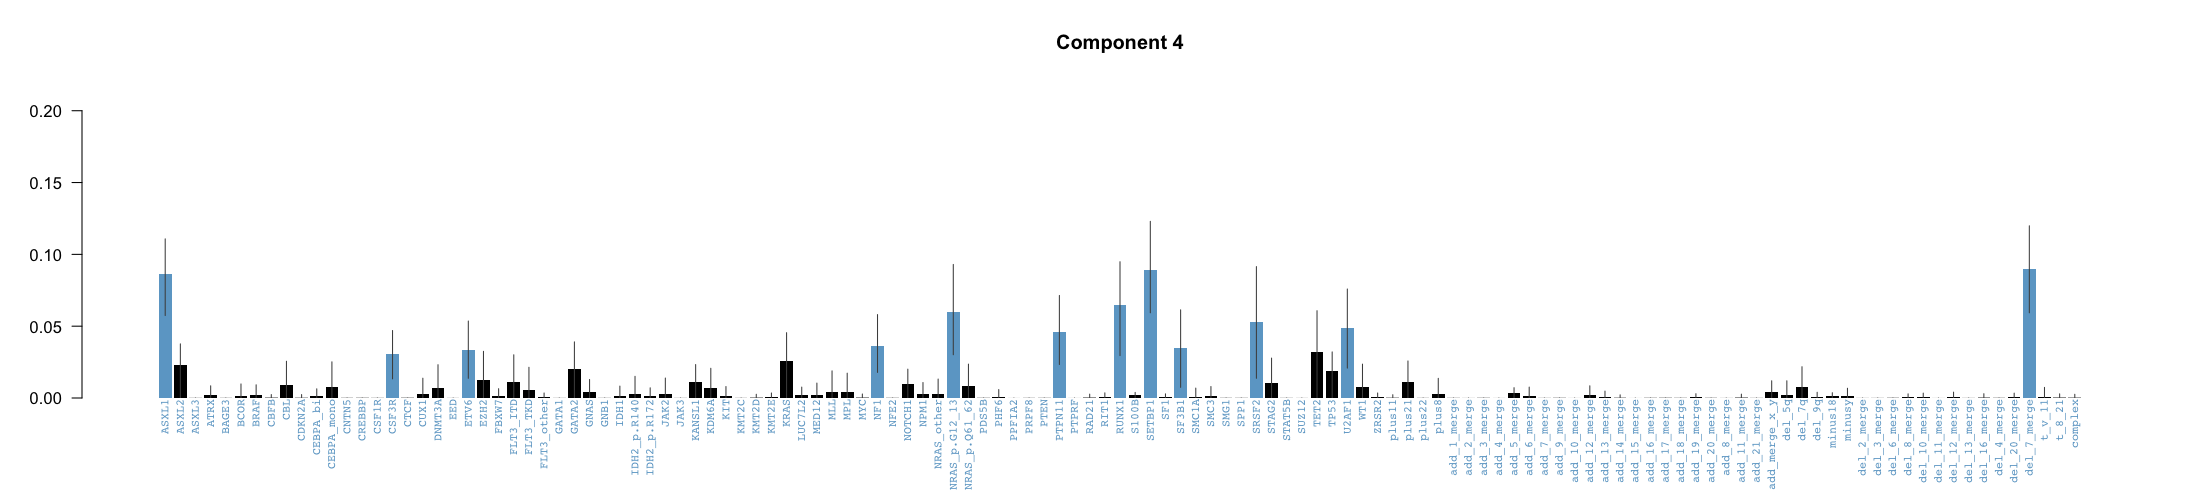

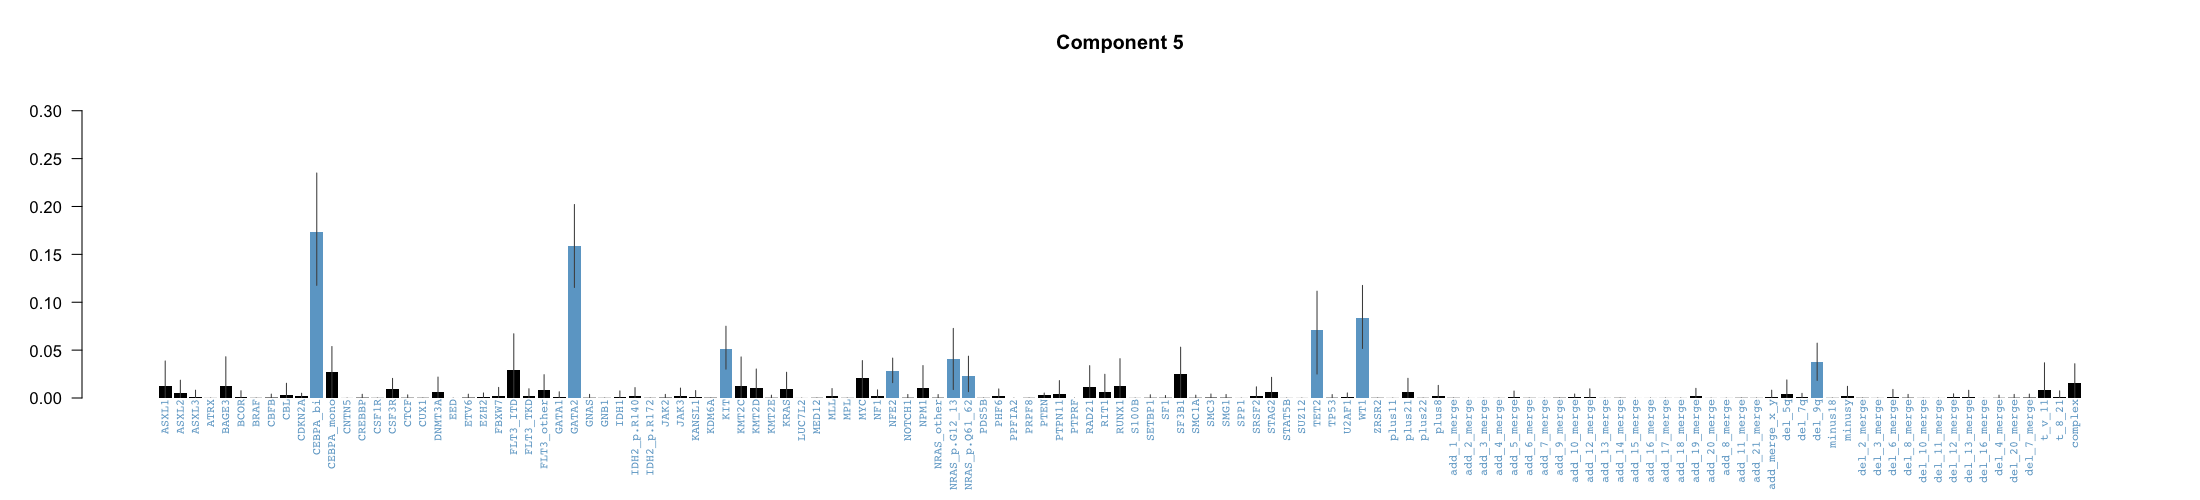

In [47]:
plot_category_distribution_by_component(multi_output_5_components, colnames(df_few_clustered))

In [51]:
dd_predicted_5_components <- get_prediction_result_dataframe(multi_output_5_components, df_few_clustered)
get_table(dd_predicted_5_components[,'predicted_component'])

Number of components: 5
Number of NA rows   : 0


values      count freq            
2  1            835  53.3546325878594
1  0            259  16.5495207667732
3  2            214  13.6741214057508
4  3            137  8.75399361022364
5  4             69  4.40894568690096
6  5             51  3.25878594249201
11 -- total -- 1565  100%

### II- Second one with 6 components

### 3 10 350 5000 gaussian

In [ ]:
hdp <- initialise_hdp_yanis(df_few_clustered,hh=gaussian,alphaa = 1,alphab= 1)

In [ ]:
number_of_chains <- 3
chain_list <- vector('list', number_of_chains)

for (i in 1:number_of_chains) {
    seed <- i * 100
    print_and_flush(sprintf('### Experiment %d (seed = %d) ###\n', i, seed))
    
    # run single hdp chain
    chain_list[[i]] <- activate_and_run_hdp(hdp,
                                            initcc = 10,
                                            burnin = 5000,
                                            n      = 350,
                                            space  = 20,
                                            seed   = seed)
    print_and_flush('\n')
}

multi_output <- hdp_multi_chain(chain_list)
multi_output

Extract HDP components from posterior sampling
  → extract components... done!
* 6 components found


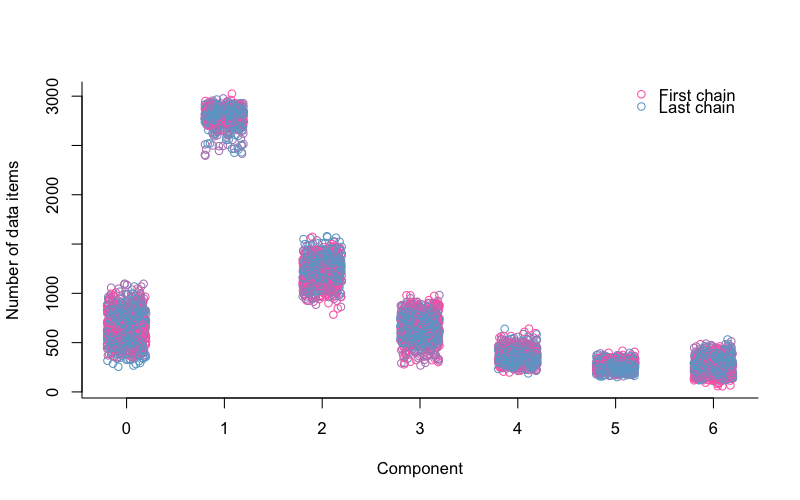

In [115]:
multi_output <- extract_components(multi_output)
plot_components_size(multi_output)

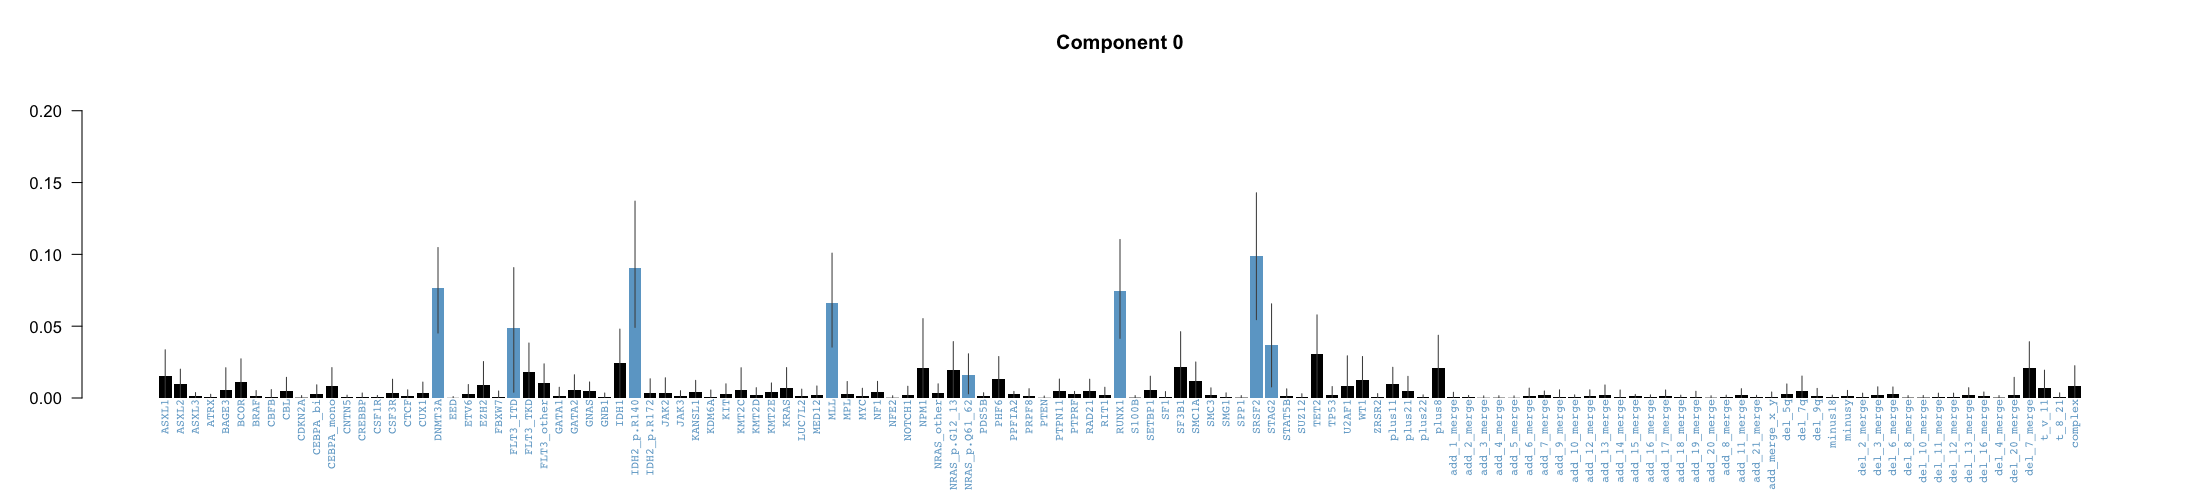

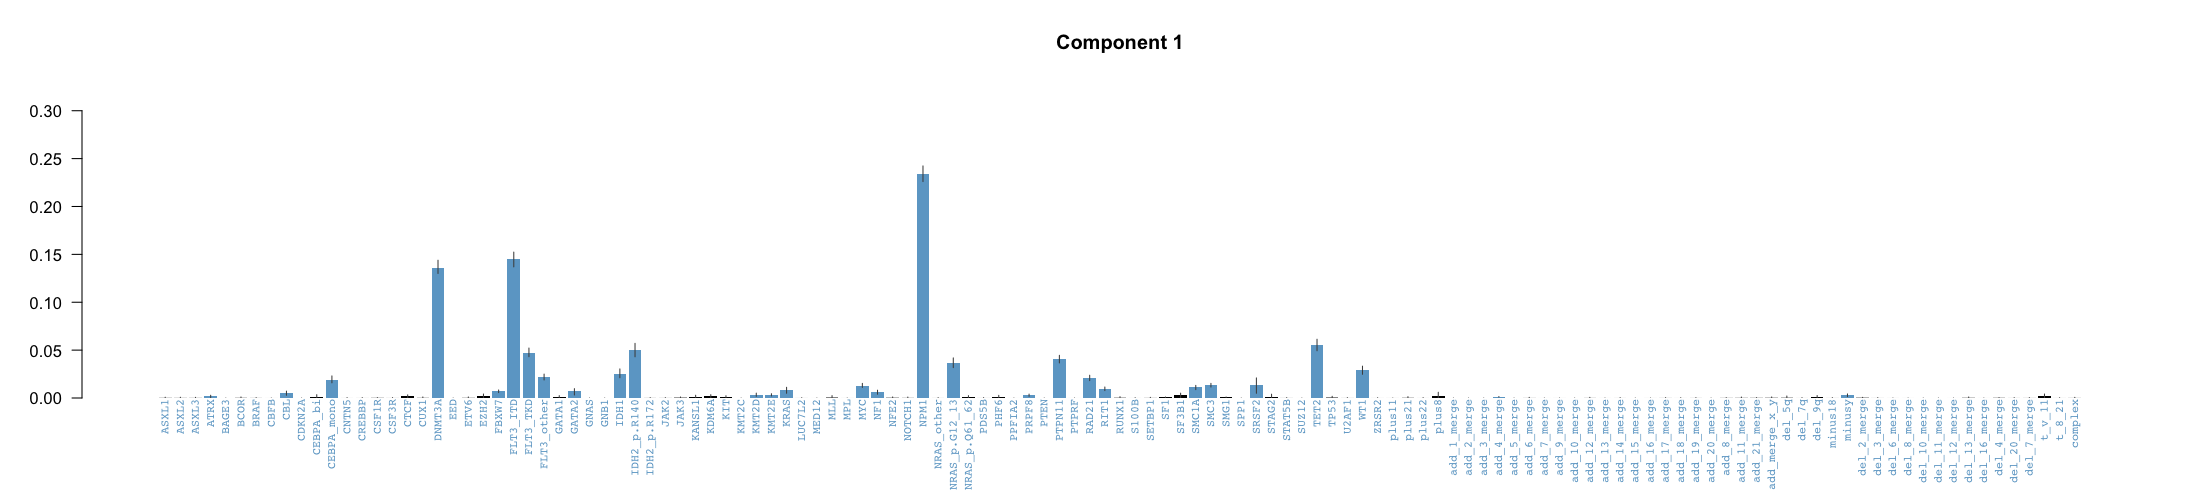

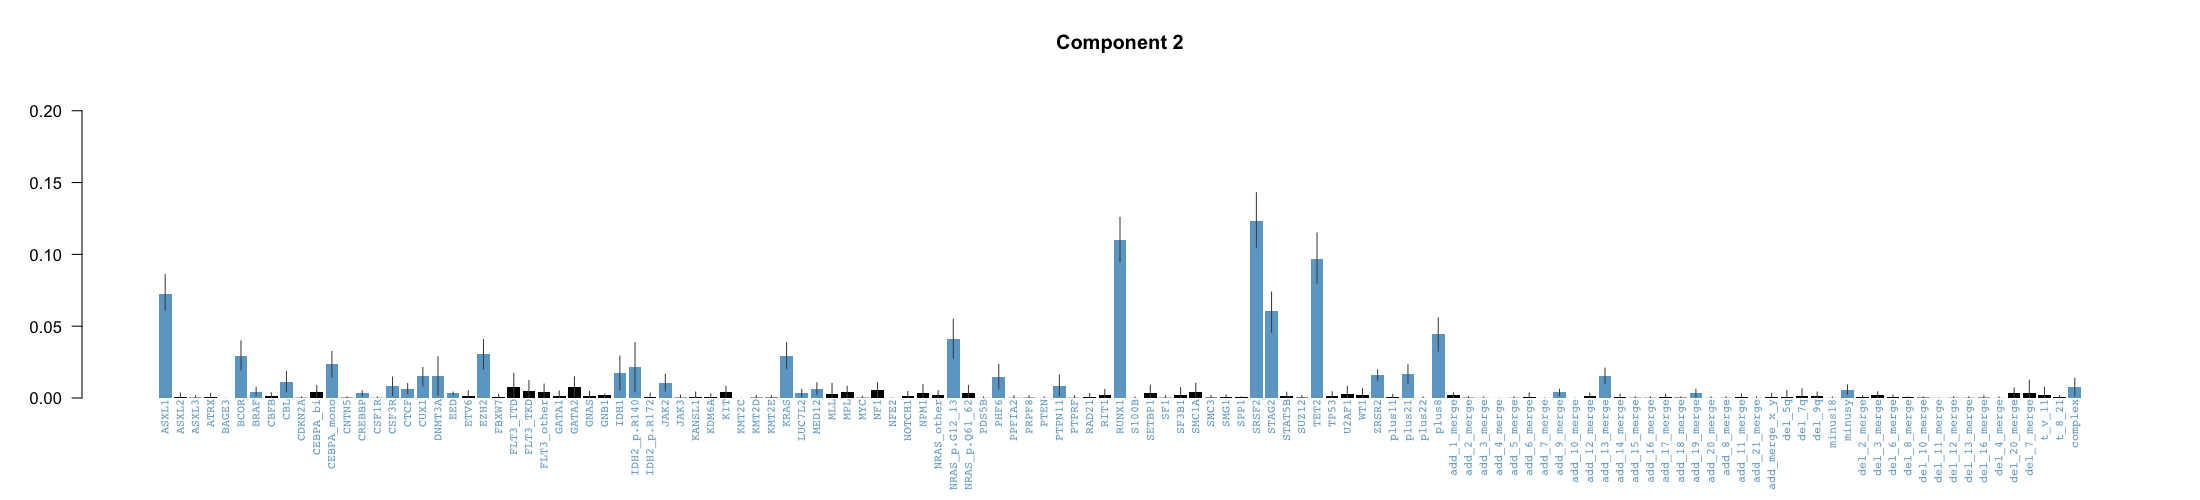

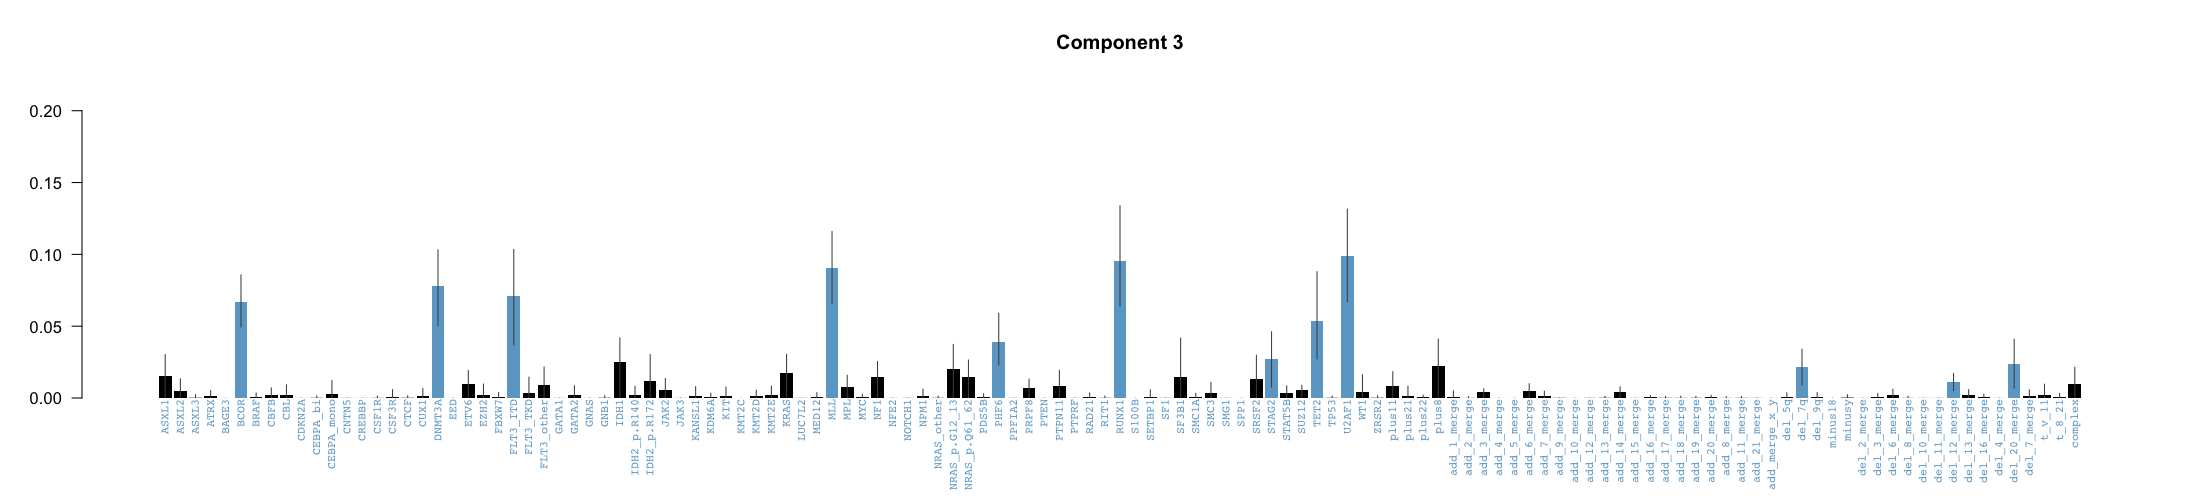

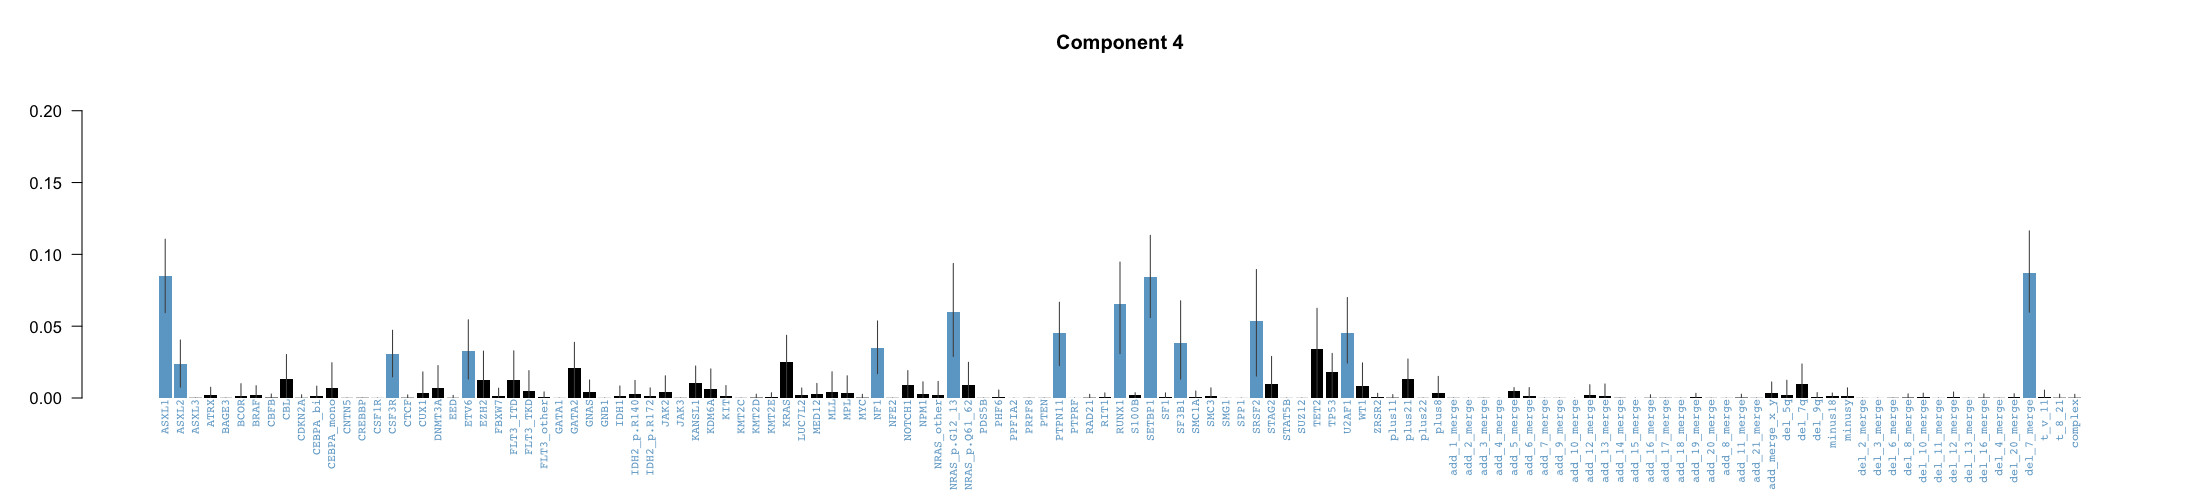

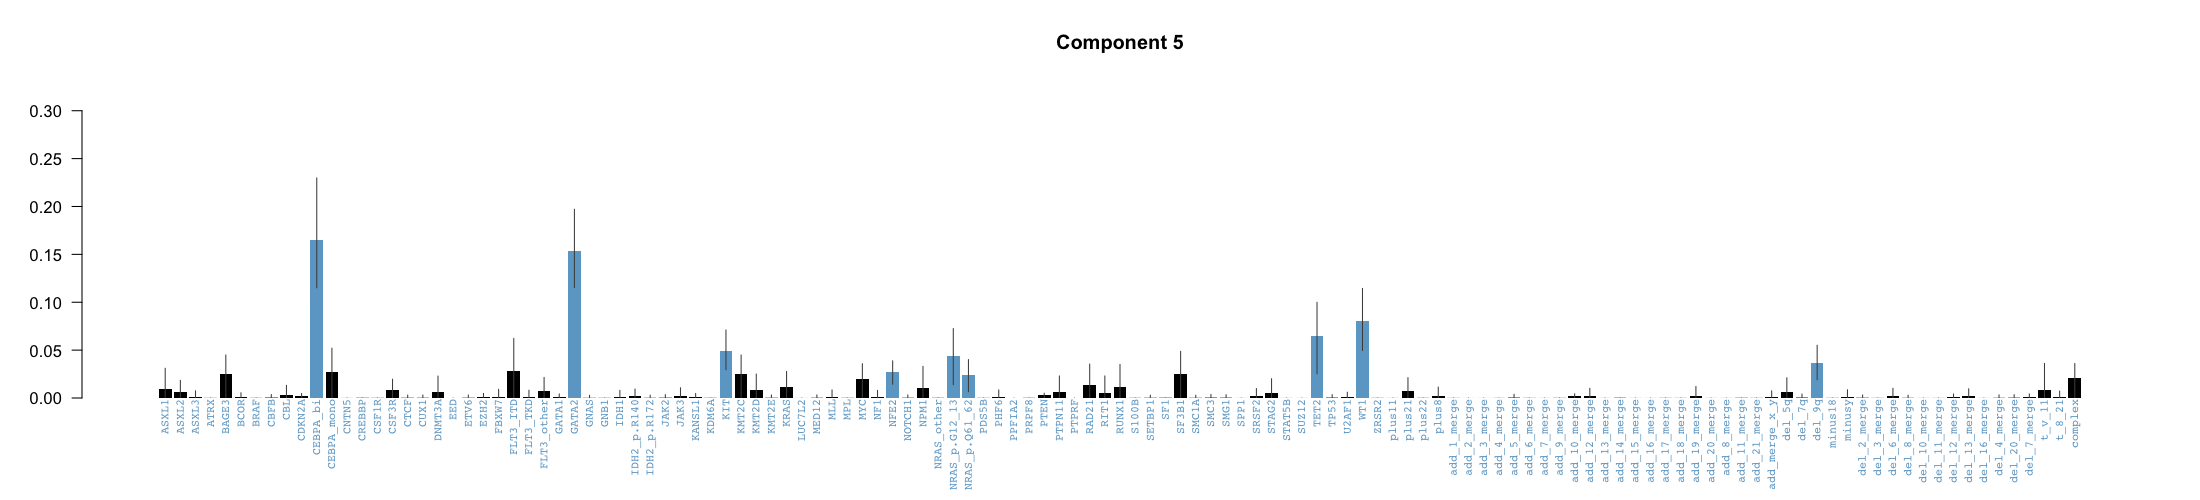

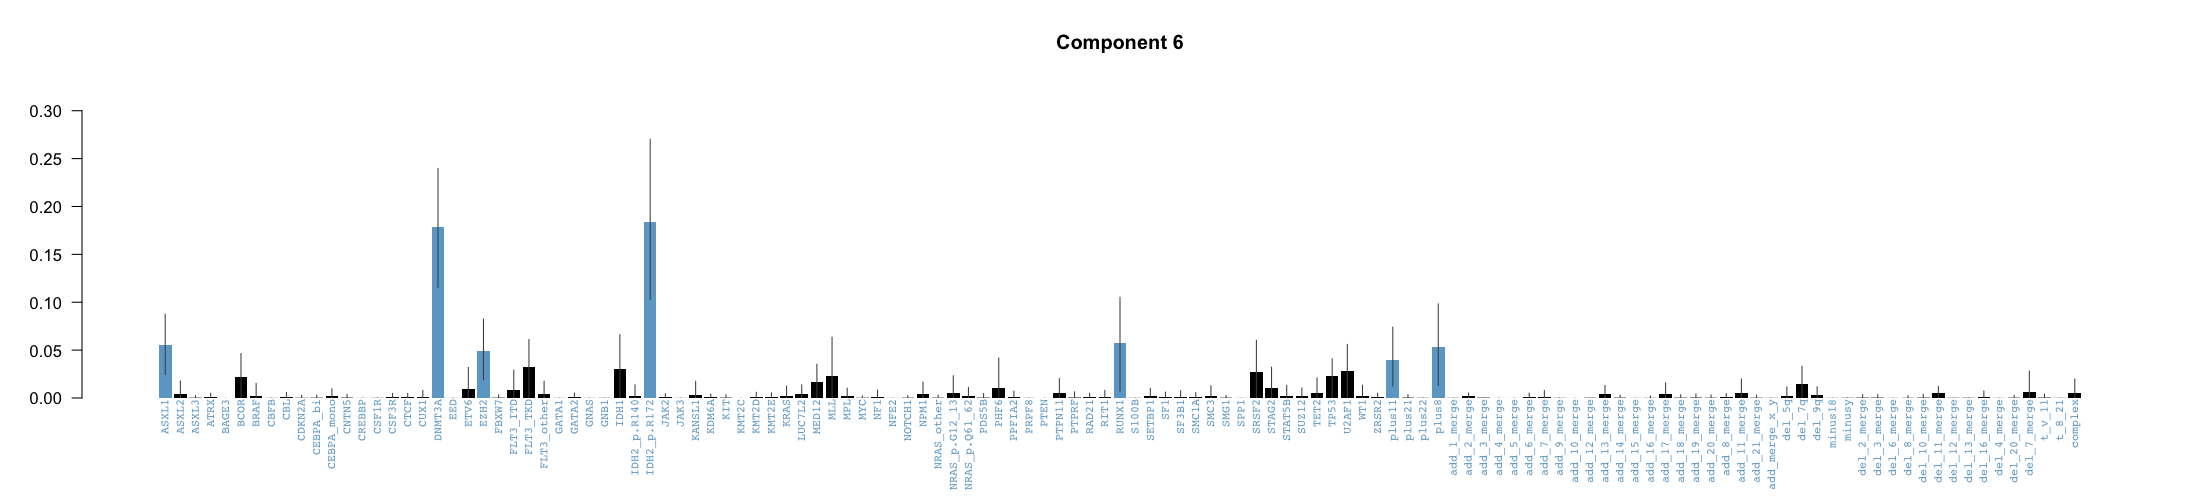

In [116]:
plot_category_distribution_by_component(multi_output, colnames(df_few_clustered))

In [117]:
dd_predicted_6_components <- get_prediction_result_dataframe(multi_output, df_few_clustered)
get_table(dd_predicted_6_components[,'predicted_component'])

Number of components: 6
Number of NA rows   : 0


values      count freq            
2  1            842  53.8019169329073
3  2            283  18.0830670926518
4  3            143  9.13738019169329
1  0            104  6.64536741214058
5  4             75  4.79233226837061
6  5             59  3.76996805111821
7  6             59  3.76996805111821
11 -- total -- 1565  100%

# LET'S LOOK AT THE RESULTS OF THE GRIDSEARCH WITH THE NEW ALPHAS TO TRY WITH 9 COMPONENTS

In [134]:
new_table <- read.table("hdp_gridsearch_new_alphas.tsv",sep = '\t' , header = T)

In [135]:
#new_table[order(new_table$n_components,decreasing=T),]
a<-new_table[new_table$n_components==9 & new_table$base_dist=='gaussian',]
a[order(a$assignment,decreasing=T),]

chains inicc n   burnin space base_dist alphaa alphab n_components
53 5      15    350 7000   20    gaussian  2      0.5    9           
35 3      17    350 5000   30    gaussian  2      0.5    9           
49 5      15    350 5000   20    gaussian  2      0.5    9           
63 5      15    450 7000   30    gaussian  2      0.5    9           
57 5      15    450 5000   20    gaussian  2      0.5    9           
85 5      17    350 7000   20    gaussian  2      0.5    9           
95 5      17    450 7000   30    gaussian  2      0.5    9           
43 3      17    450 5000   30    gaussian  2      0.5    9           
47 3      17    450 7000   30    gaussian  2      0.5    9           
51 5      15    350 5000   30    gaussian  2      0.5    9           
75 5      16    450 5000   30    gaussian  2      0.5    9           
39 3      17    350 7000   30    gaussian  2      0.5    9           
45 3      17    450 7000   20    gaussian  2      0.5    9           
55 5      15    350 7000   30    gaussian  2      0.5    9           
71 5      16    350 7000   30    gaussian  2      0.5    9           
69 5      16    350 7000   20    gaussian  2      0.5    9           
61 5      15    450 7000   20    gaussian  2      0.5    9           
59 5      15    450 5000   30    gaussian  2      0.5    9           
65 5      16    350 5000   20    gaussian  2      0.5    9           
79 5      16    450 7000   30    gaussian  2      0.5    9           
91 5      17    450 5000   30    gaussian  2      0.5    9           
83 5      17    350 5000   30    gaussian  2      0.5    9           
81 5      17    350 5000   20    gaussian  2      0.5    9           
89 5      17    450 5000   20    gaussian  2      0.5    9           
   component_0 assignment Davies_Bouldin Silhouette
53  40         1839       3.199985       0.04724330
35  55         1837       3.222767       0.04535148
49  47         1837       3.207263       0.04438552
63  39         1837       3.215689       0.04305042
57  44         1834       3.201202       0.04460935
85  43         1834       3.210916       0.04626355
95  35         1834       3.215774       0.04694126
43  51         1833       3.219709       0.04447690
47  41         1833       3.204925       0.04594850
51  41         1831       3.206448       0.04408969
75  34         1831       3.208875       0.04588650
39  48         1830       3.206437       0.04698321
45  52         1830       3.217440       0.04689116
55  42         1829       3.241067       0.04284499
71  33         1828       3.207124       0.04630450
69  39         1827       3.217526       0.04448290
61  44         1826       3.232486       0.04452278
59  45         1825       3.237799       0.04128738
65  45         1824       3.237179       0.04254166
79  27         1822       3.200139       0.04756845
91  37         1819       3.231595       0.04335274
83  56         1784       3.332408       0.04369850
81 113         1780       3.522162       0.03886410
89  65         1773       3.343364       0.04211010

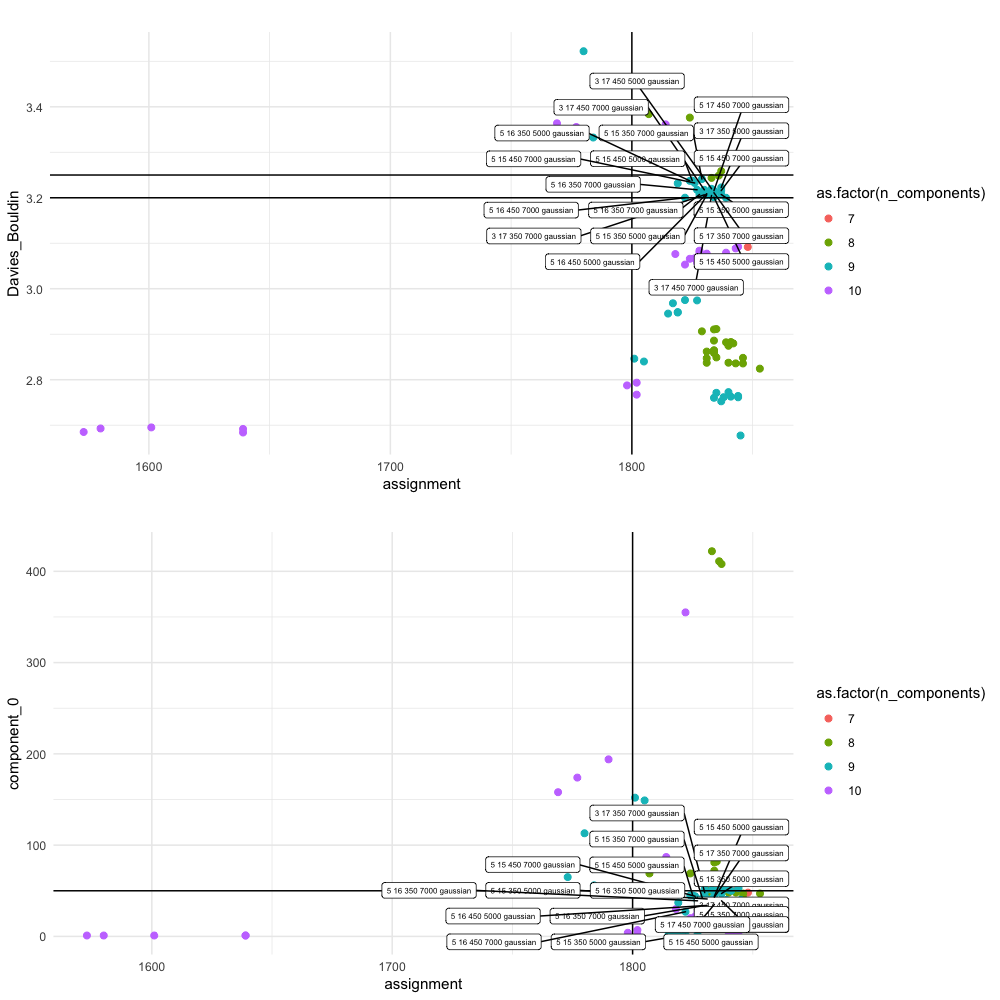

In [32]:
set_notebook_plot_size(10, 10)

# add labels
#new_table_S_DB <- new_table[new_table$assignment > 1800 & new_table$n_components > 8,]
#new_table_S_DB$good <- ifelse(new_table_S_DB$assignment > 1800 & new_table$n_components > 8, paste(new_table_S_DB$chains,new_table_S_DB$inicc,new_table_S_DB$n,new_table_S_DB$burnin,new_table_S_DB$base_dist),'')

new_table_S_DB <- new_table[new_table$assignment > 1820 & new_table$Davies_Bouldin > 3.2,]
new_table_S_DB$good <- ifelse(new_table_S_DB$assignment > 1820 & new_table_S_DB$Davies_Bouldin > 3.2 & new_table_S_DB$Davies_Bouldin < 3.25 & new_table_S_DB$n_components==9, paste(new_table_S_DB$chains,new_table_S_DB$inicc,new_table_S_DB$n,new_table_S_DB$burnin,new_table_S_DB$base_dist),'')

new_table_A_0 <- new_table[new_table$assignment > 1820 & new_table$component_0 < 50,]
new_table_A_0$good <- ifelse(new_table_A_0$assignment > 1820 & new_table_A_0$component_0 < 50 & new_table_A_0$n_components==9, paste(new_table_A_0$chains,new_table_A_0$inicc,new_table_A_0$n,new_table_A_0$burnin,new_table_S_DB$base_dist),'')

g1 <- ggplot(new_table) +
        geom_point(aes(x = assignment, y = Davies_Bouldin, col = as.factor(n_components)), size = 2) +
        #scale_color_manual(values=c("red", "orange", "green",'blue',"dark", "orange", "green",'blue',"red", "orange", "green",'blue'), labels = 0:11, name = 'Number of components') +
        ggtitle('') +
        geom_hline(yintercept = 3.2) +#we want higher than 3rd quart
        geom_hline(yintercept = 3.25) +
        geom_vline(xintercept = 1800) + #we want higher than 3rd quart
        geom_label_repel(aes(x = assignment, y = Davies_Bouldin, label=good), size=2, data=new_table_S_DB)

g2 <- ggplot(new_table) +
        geom_point(aes(x = assignment, y = component_0, col = as.factor(n_components)), size = 2) +
        #scale_color_manual(values=c("red", "orange", "green",'blue'),labels = 8:11, name = 'Number of components') +
        ggtitle('') +
        geom_hline(yintercept = 50)+#we want lower than 1st quart
        geom_vline(xintercept = 1800) + #we want higher than 3rd quart
        geom_label_repel(aes(x = assignment, y = component_0, label=good), size=2, data=new_table_A_0)

grid.arrange(g1, g2, ncol = 1)

### 5 15 450 7000 30 gaussian 

In [33]:
###Binomial
num_cols = ncol(df_final)
bin <- function(x){
    set.seed(123)
  (rbinom(1, num_cols, mean(x))+1)/num_cols
}

###Normal

normal <- function(x){
    set.seed(234)
  abs(rnorm(1,mean(x),sd(x)))
}

###Poisson

poisson <- function(x){
    set.seed(123)
  (rpois(num_cols,1)+1)/num_cols
}

###Uniform equally over all columns

equally <- function(x){
    set.seed(123)
  1/num_cols
}

###Repet 1

repet <- function(x){
    set.seed(123)
  1
}

#sapply(df_gene,equally)
binomial <- unlist(sapply(df_final,bin))
gaussian <- unlist(sapply(df_final,normal))
pois <- as.numeric(unlist(sapply(df_final,poisson)))
unif <- unlist(sapply(df_final,equally))
repetition <- unlist(sapply(df_final,repet))

In [ ]:
hdp <- initialise_hdp_yanis(df_final,hh=gaussian,alphaa = 2,alphab= 0.5)

In [139]:
number_of_chains <- 5
chain_list <- vector('list', number_of_chains)

for (i in 1:number_of_chains) {
    seed <- i * 100
    print_and_flush(sprintf('### Experiment %d (seed = %d) ###\n', i, seed))
    
    # run single hdp chain
    chain_list[[i]] <- activate_and_run_hdp(hdp,
                                            initcc = 15,
                                            burnin = 7000,
                                            n      = 450,
                                            space  = 30,
                                            seed   = seed)
    print_and_flush('\n')
}

multi_output <- hdp_multi_chain(chain_list)
multi_output

### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

### Experiment 4 (seed = 400) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

### Experiment 5 (seed = 500) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"



Object of class hdpSampleMulti 
 Number of chains: 5 
 Total posterior samples: 2250 
 Components: NO. Run hdp_extract_components 
 ----------
 Final hdpState from first chain: 
Object of class hdpState 
 Number of DP nodes: 2151 
 Index of parent DP: 0 1 1 1 1 1 1 1 1 1 ...
 Number of data items per DP: 0 2 2 6 3 6 2 4 3 2 ...
 Index of conparam per DP: 1 1 1 1 1 1 1 1 1 1 ...
 Conparam hyperparameters and current value:
           Shape Rate     Value
Conparam 1     2  0.5 0.3943973
 Number of data categories: 142 
 Number of clusters: 14 
 Initialised with 15 clusters, using random seed 100 

Extract HDP components from posterior sampling
  → extract components... done!
* 9 components found


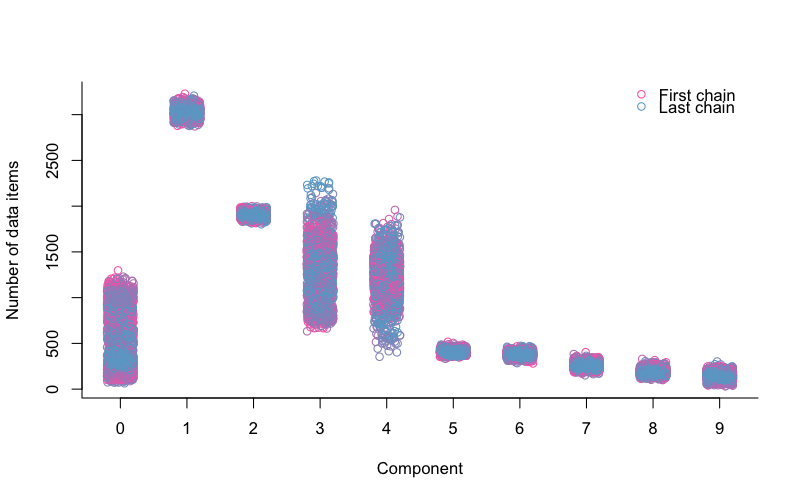

In [141]:
multi_output <- extract_components(multi_output)
plot_components_size(multi_output)

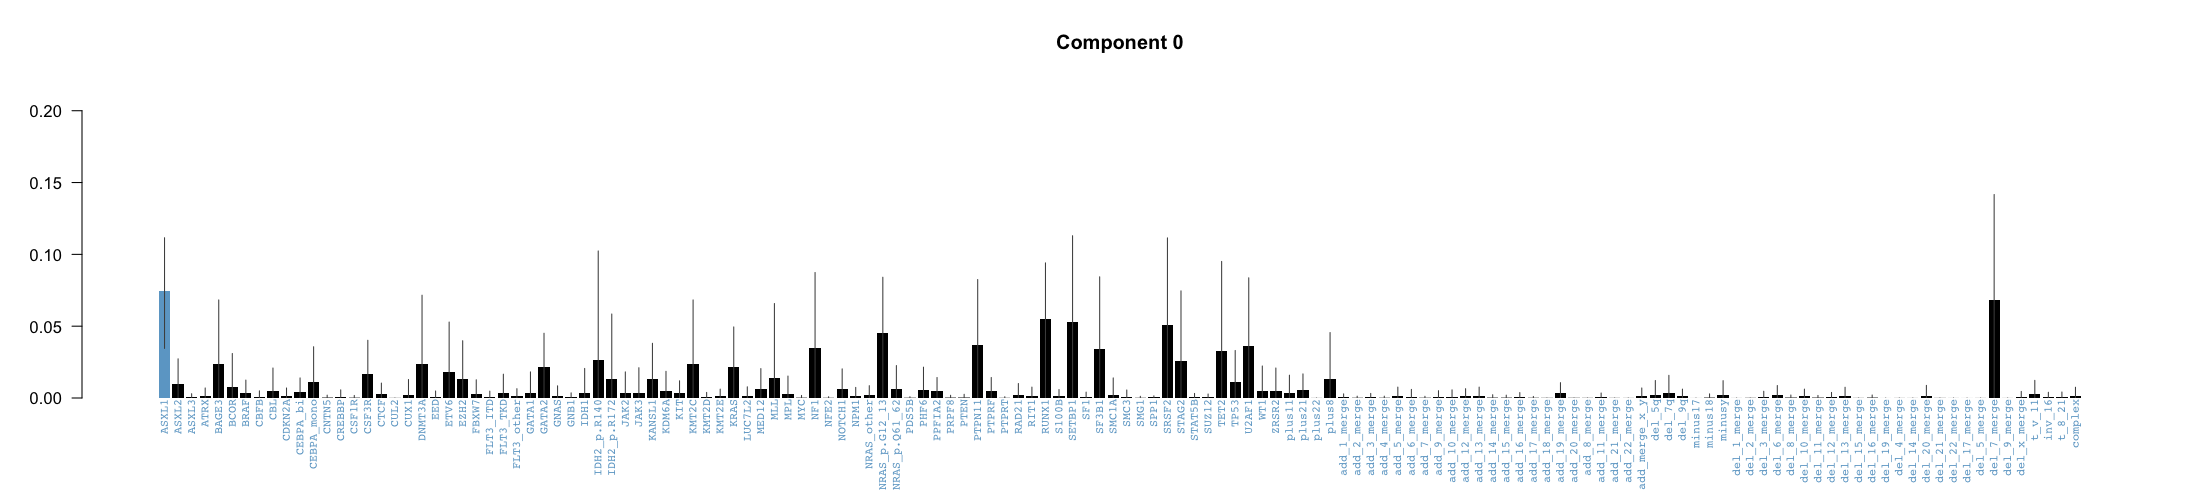

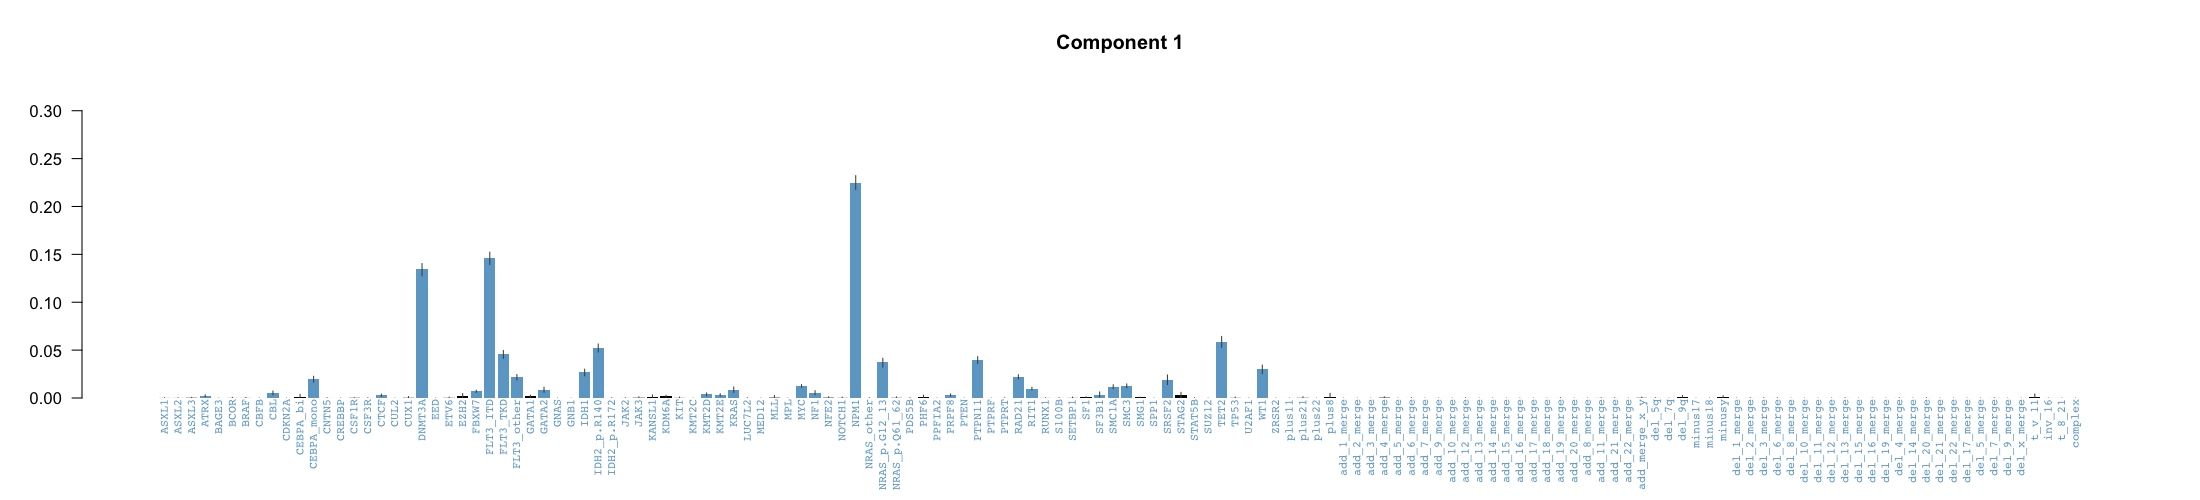

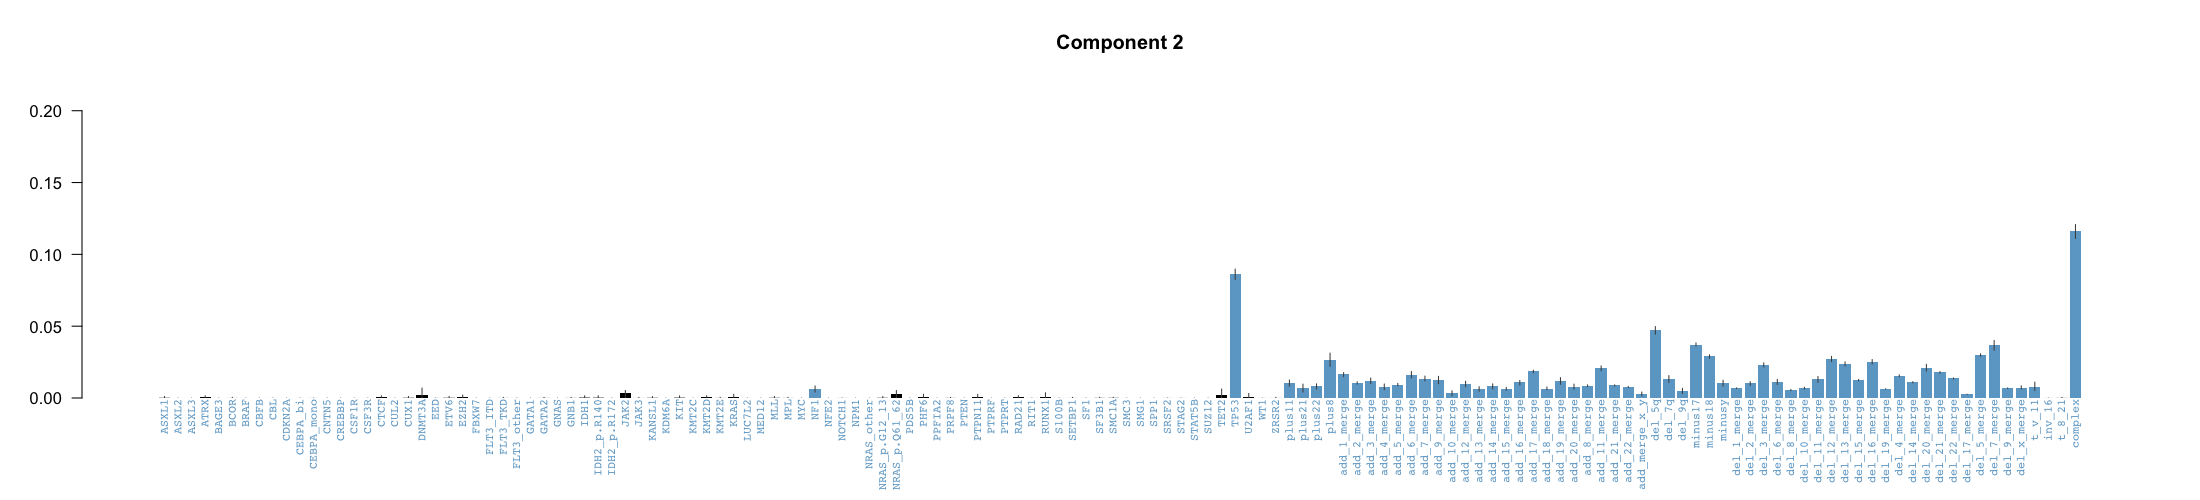

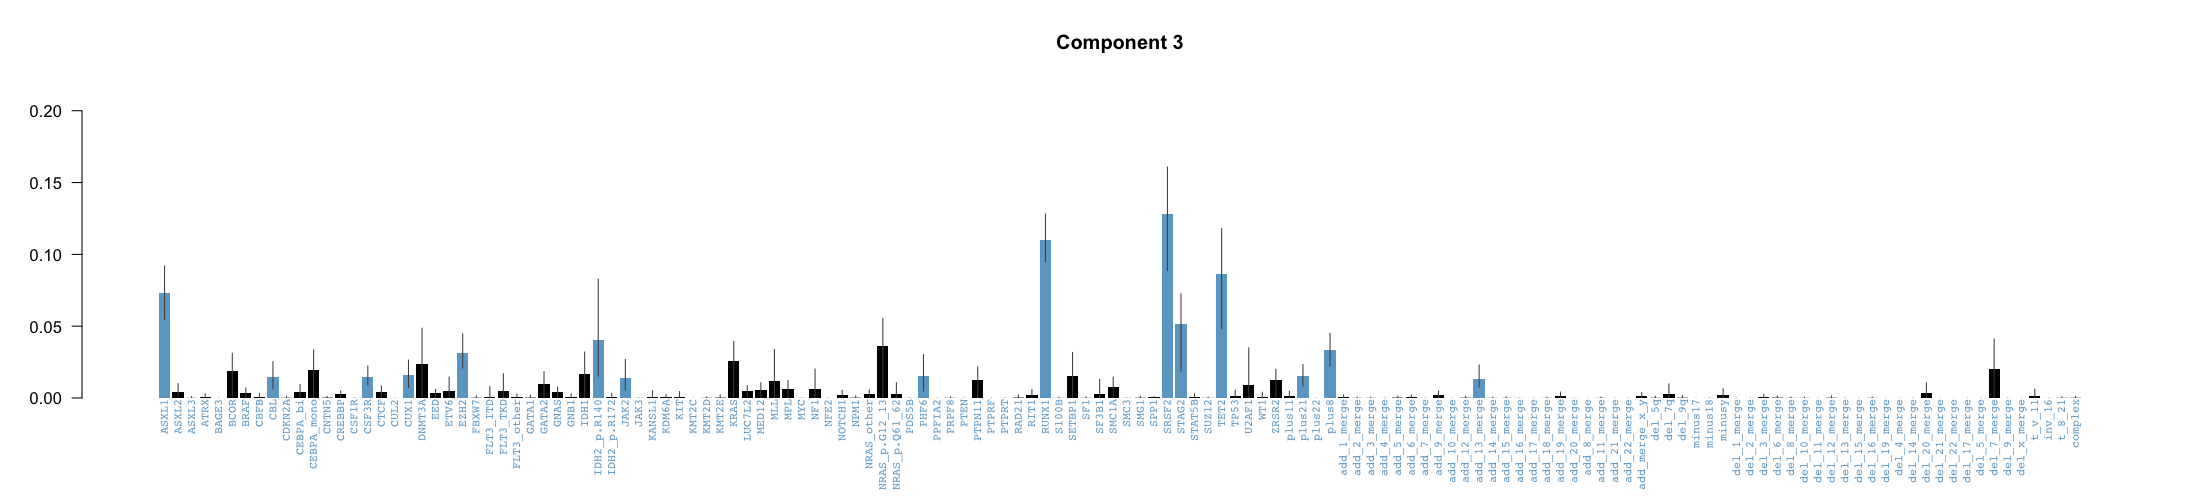

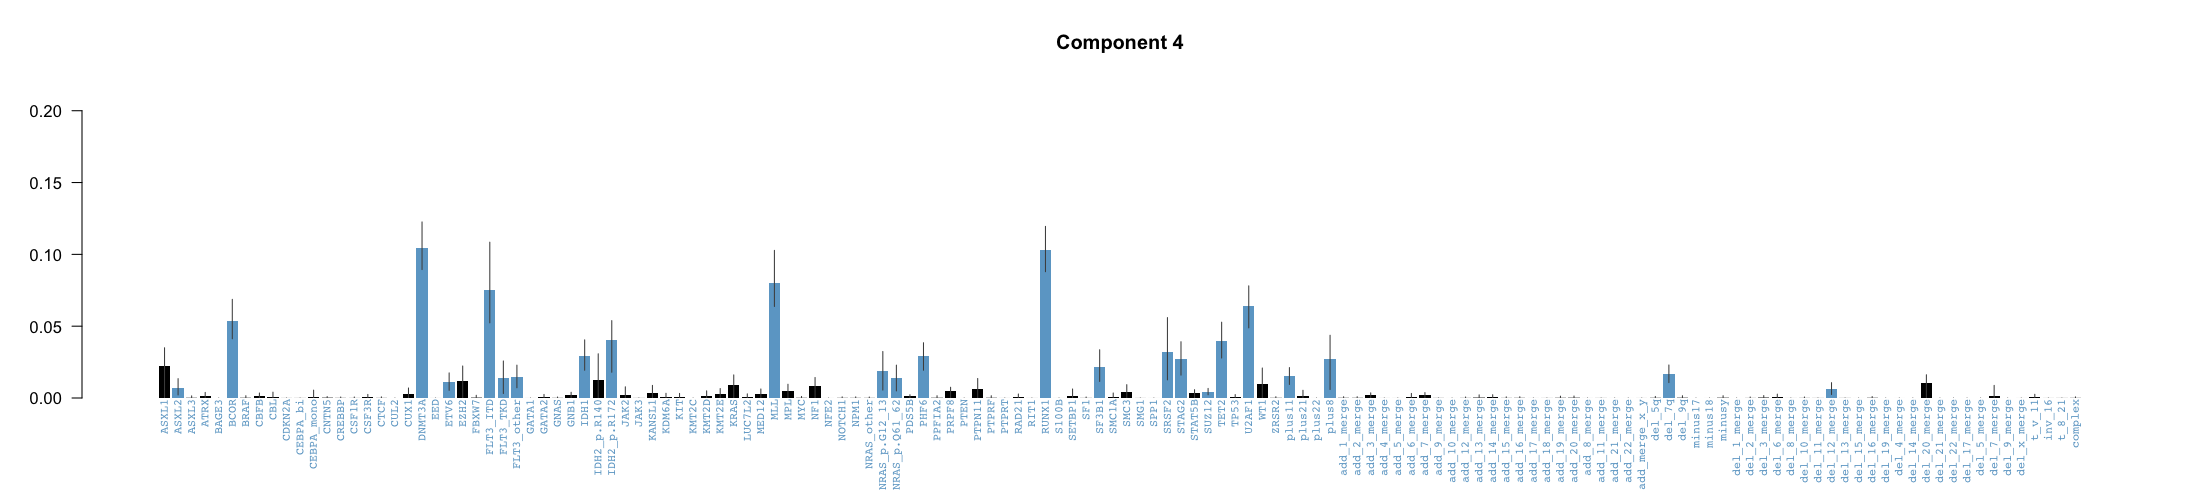

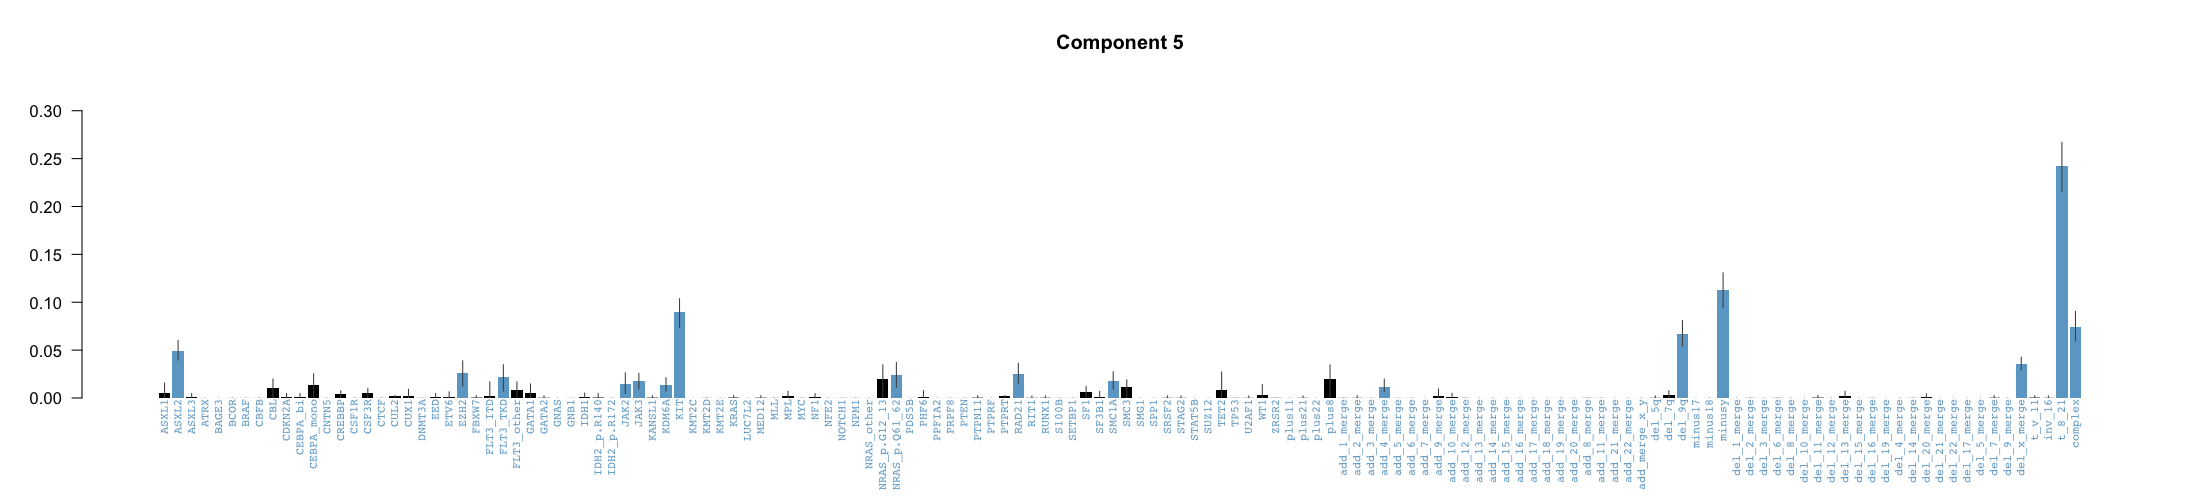

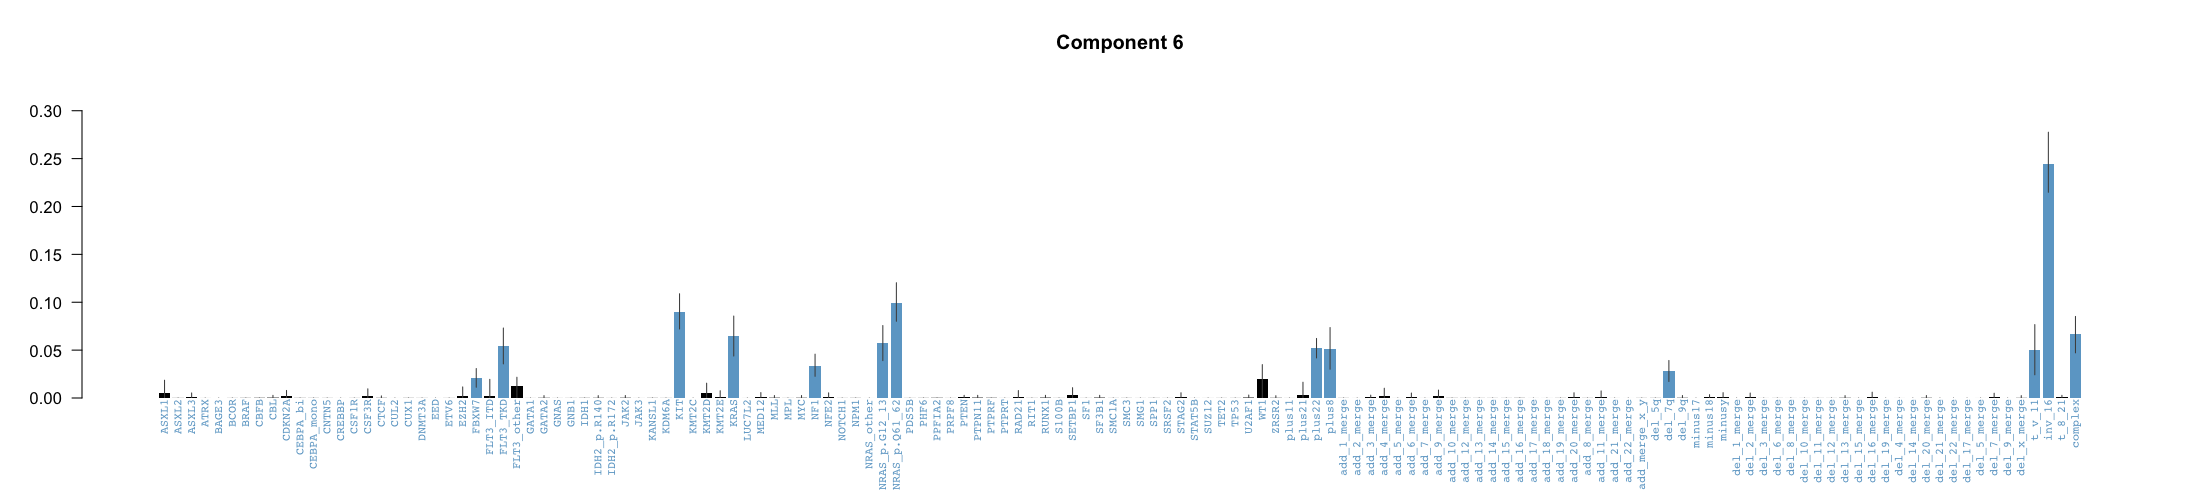

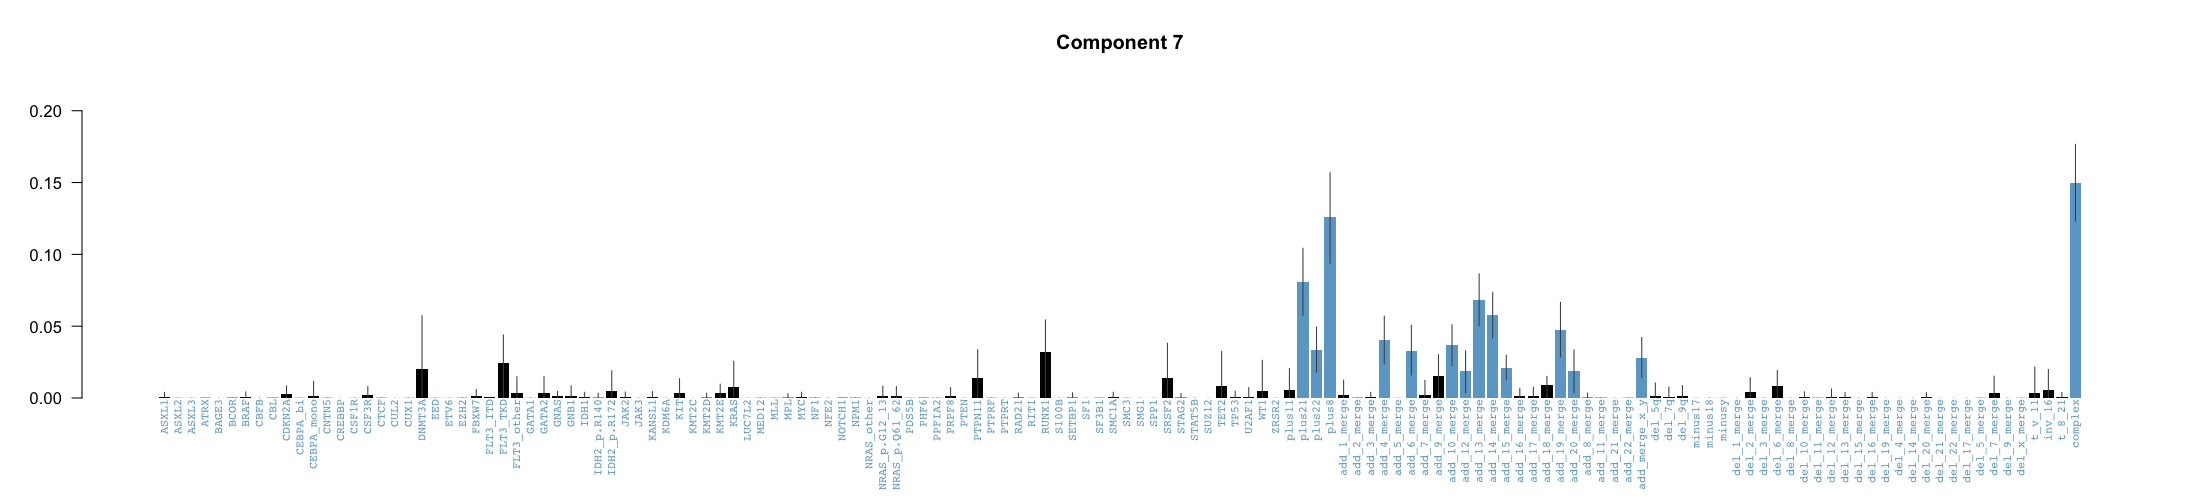

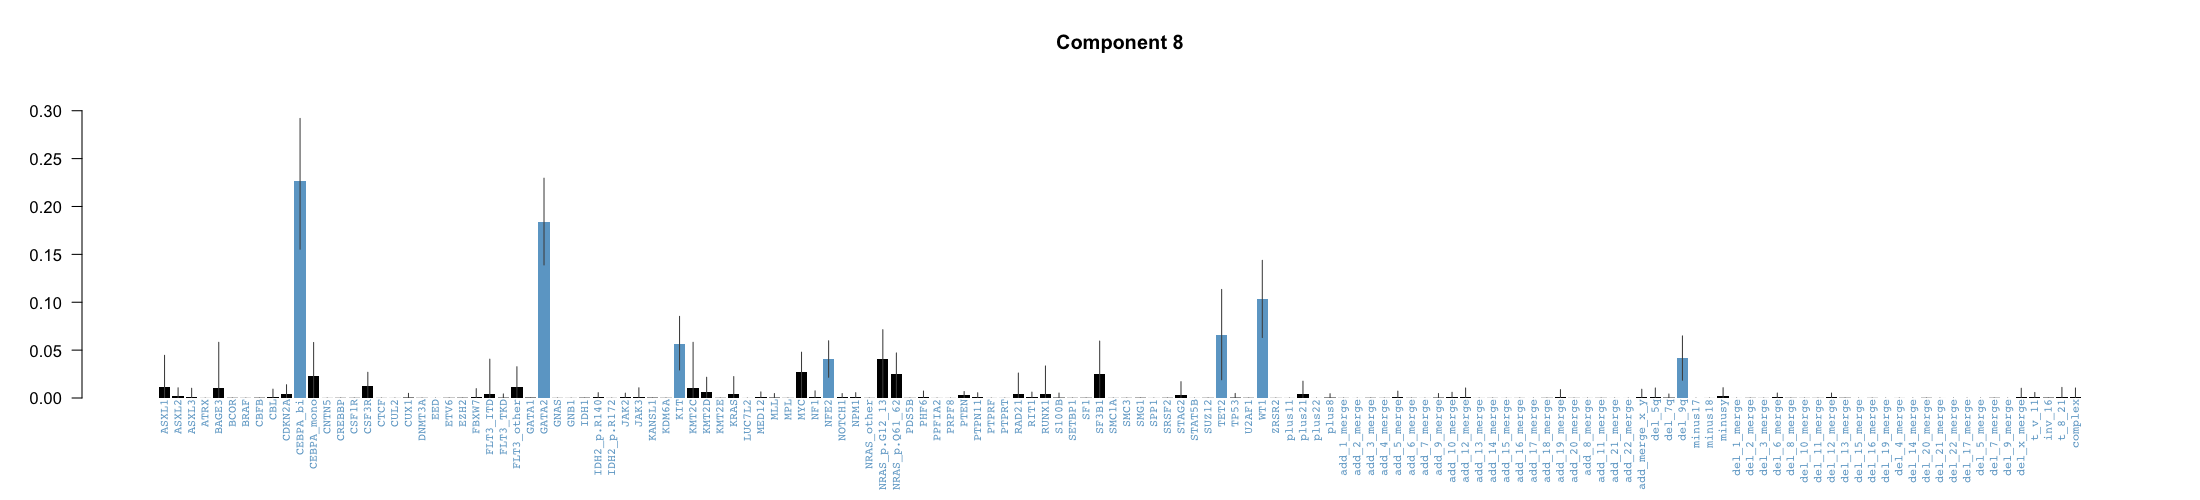

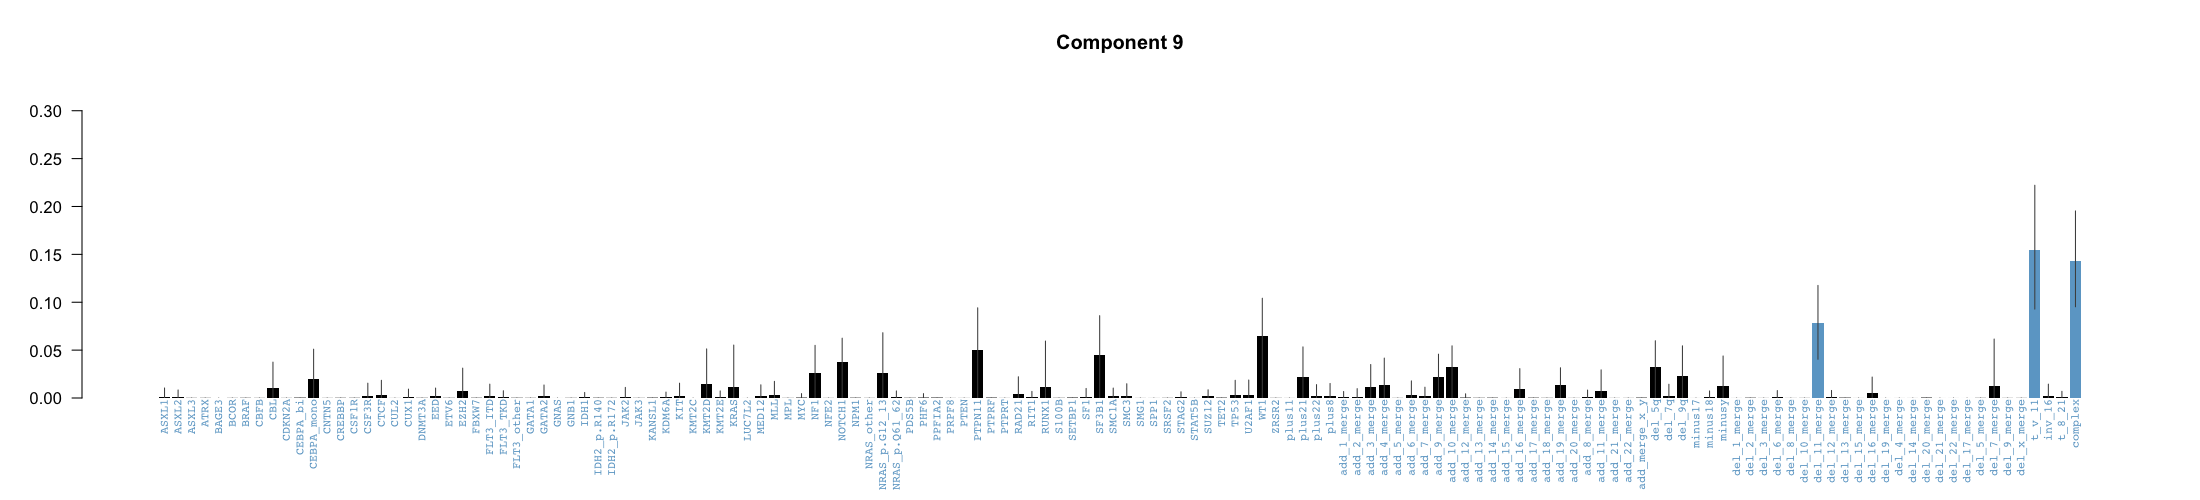

In [142]:
plot_category_distribution_by_component(multi_output, colnames(df_final))

In [143]:
dd_predicted_9_components <- get_prediction_result_dataframe(multi_output, df_final)
get_table(dd_predicted_9_components[,'predicted_component'])

Number of components: 9
Number of NA rows   : 62


values      count freq            
2  1            847  39.3953488372093
4  3            328  15.2558139534884
5  4            301  14              
3  2            235  10.9302325581395
7  6            122  5.67441860465116
6  5            112  5.2093023255814 
11 NaN           62  2.88372093023256
9  8             45  2.09302325581395
1  0             39  1.81395348837209
8  7             35  1.62790697674419
10 9             24  1.11627906976744
12 -- total -- 2150  100%

# Elli's request stacked barplot to look at the ratio of components of initial clustering in the new clustering with 6 components.

## I) 10 components compared with 6 components

##### Let's prepare the dataframes with 6,10 components that we will merge to look at the stacked barplot

In [223]:
df_10_component <- cbind(df_final, dd_predicted_10_components)

In [224]:
df_6_component <- df_10_component[df_10_component$predicted_component == 1 | df_10_component$predicted_component == 3 | df_10_component$predicted_component == 4 | df_10_component$predicted_component == 8 | df_10_component$predicted_component == 10,]
dim(df_6_component)
df_6_component$predicted_old_component <- df_6_component$predicted_component
dim(df_6_component)
df_6_component <- df_6_component['predicted_old_component']
dim(df_6_component)

[1] 1565  155

[1] 1565  156

[1] 1565    1

In [225]:
tmp <- cbind(df_6_component, dd_predicted_6_components['predicted_component'])

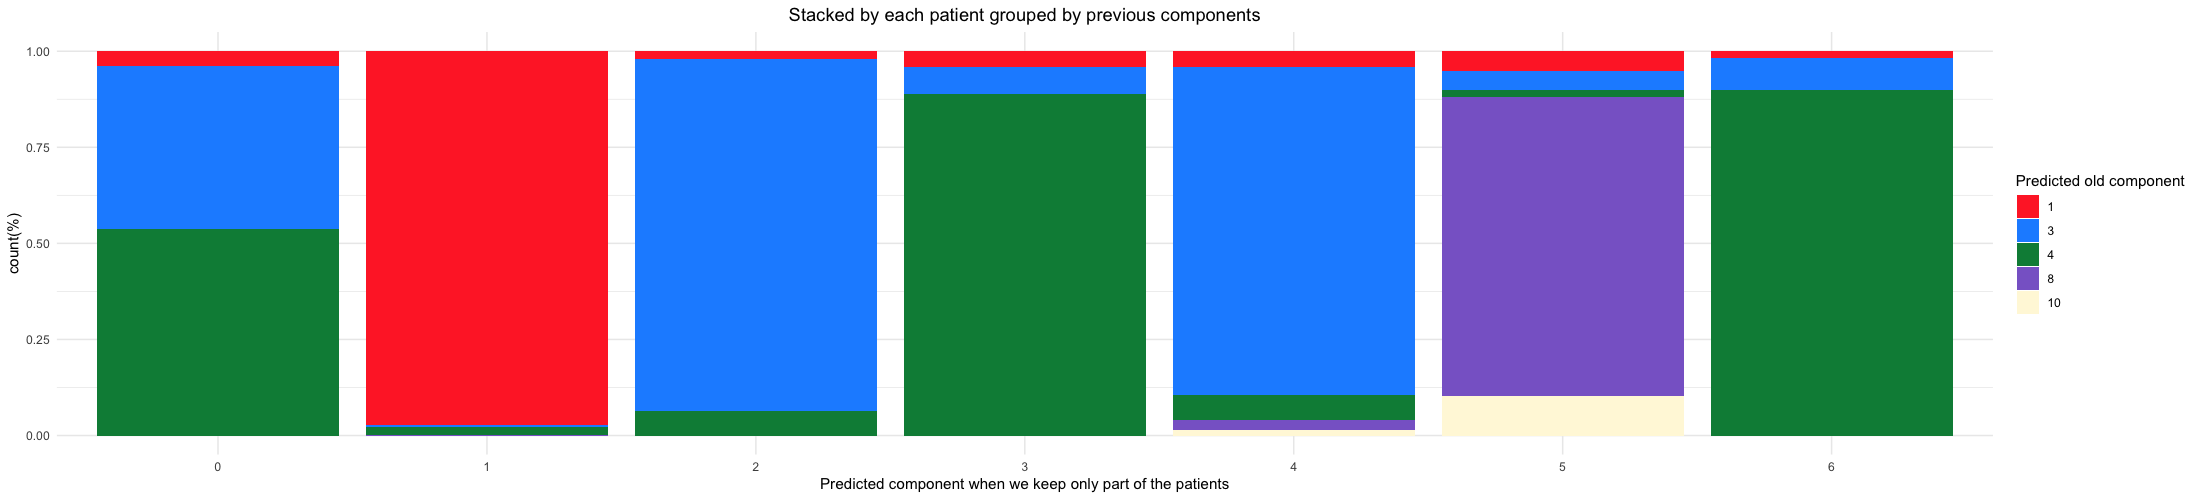

In [248]:
ggplot(tmp, aes(factor(tmp$predicted_component),fill = tmp$predicted_old_component,,order=predicted_old_component)) +
geom_bar(stat="count", position = "fill") + 
scale_fill_manual(values=c("firebrick1","dodgerblue","springgreen4","mediumpurple3","cornsilk"))+
labs(x = "Predicted component when we keep only part of the patients",title="Stacked by each patient grouped by previous components",fill="Predicted old component",y='count(%)')+
theme(plot.title = element_text(hjust = 0.5))

### Let's look at remaining component from initial clustering with what we have found in the new reduced clustering to show again that the highlighted features are the same compared to the initial clustering.

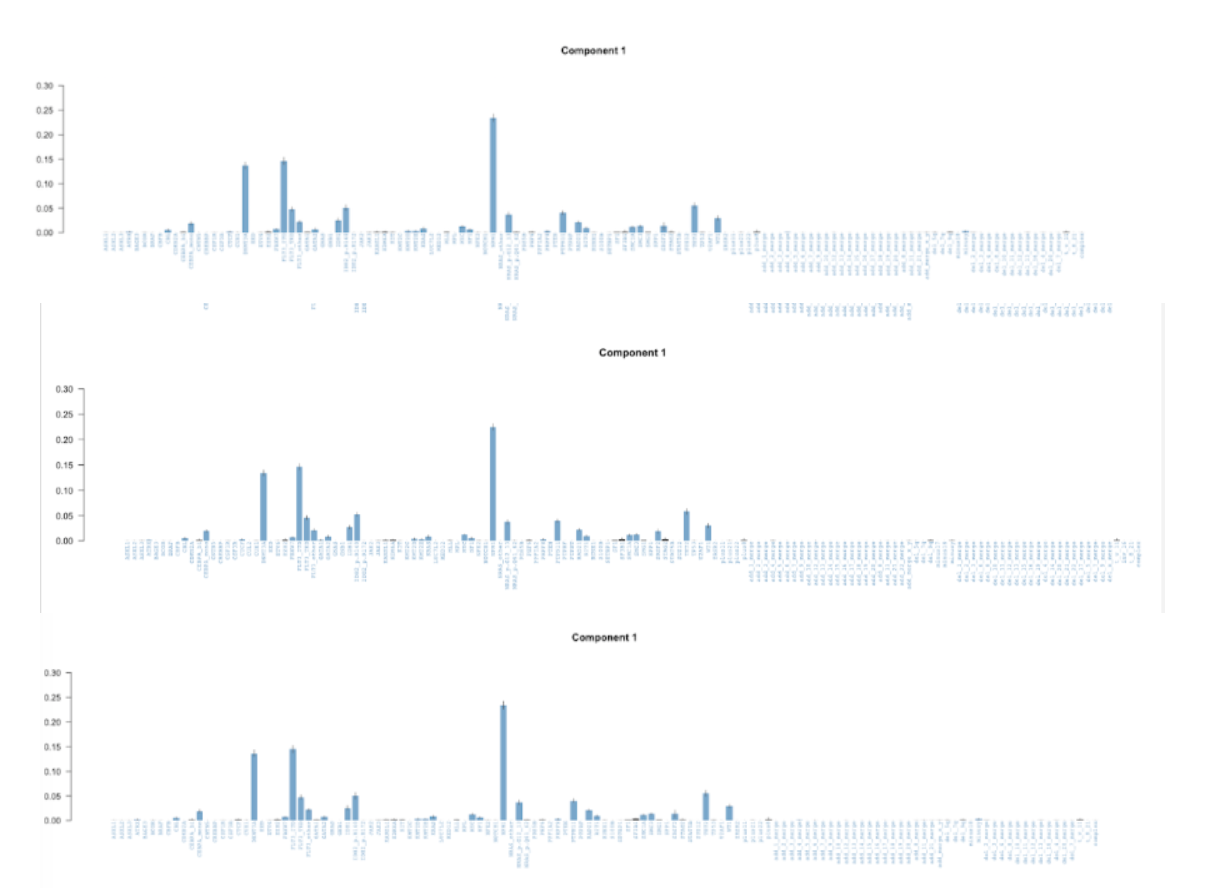

In [251]:
display_png(file="/Users/taziy/Desktop/component1.png")  


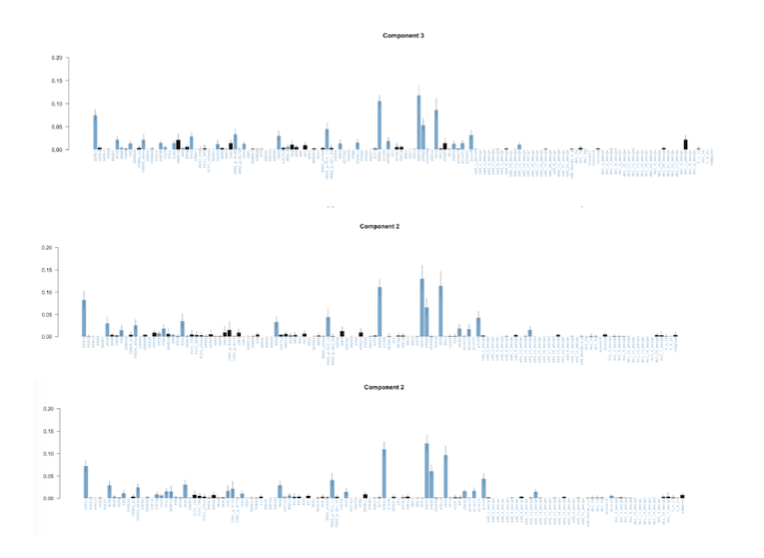

In [252]:
display_png(file="/Users/taziy/Desktop/component3.png")  

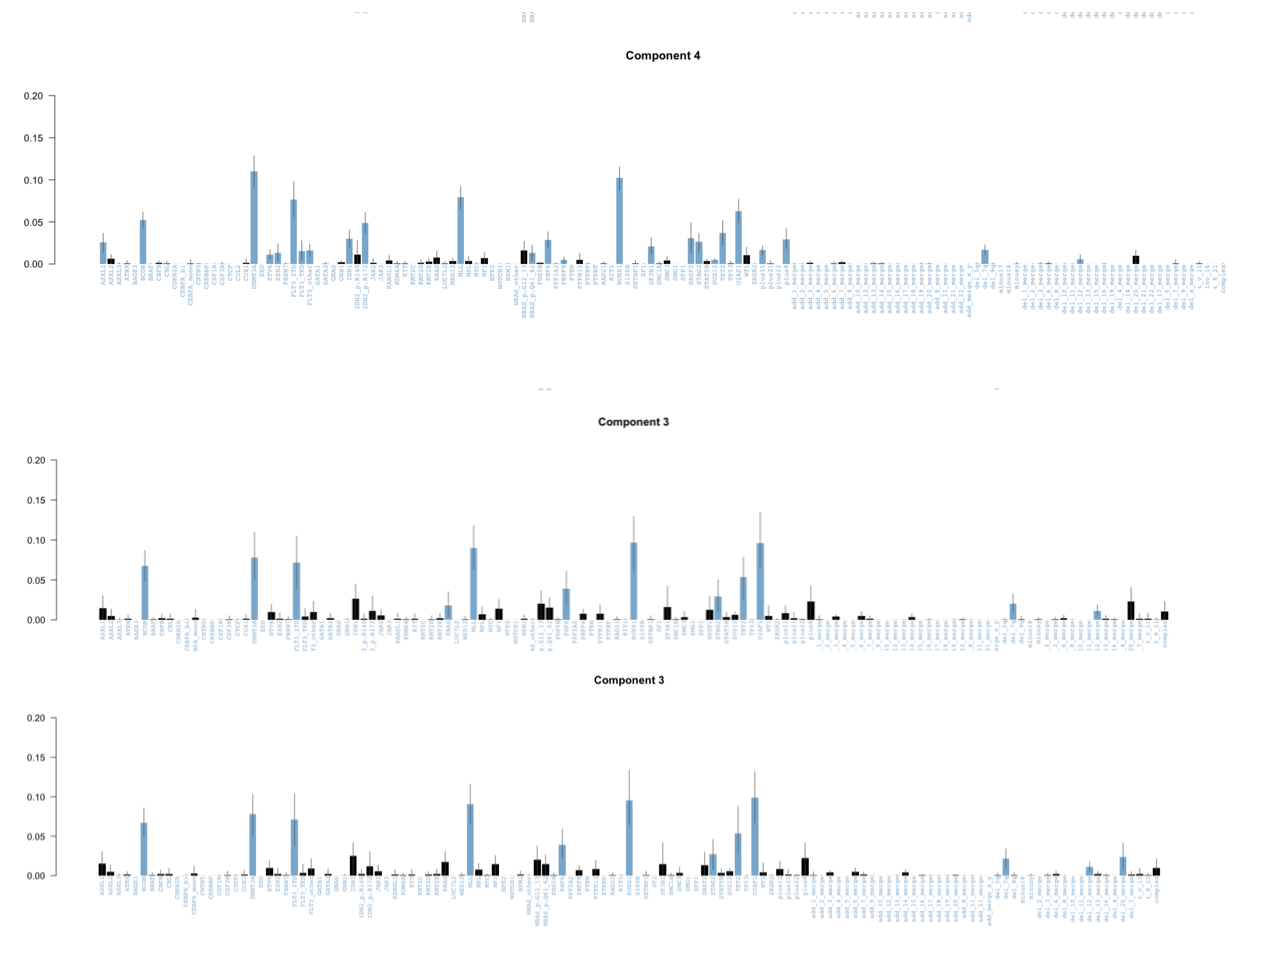

In [253]:
display_png(file="/Users/taziy/Desktop/component4.png")  

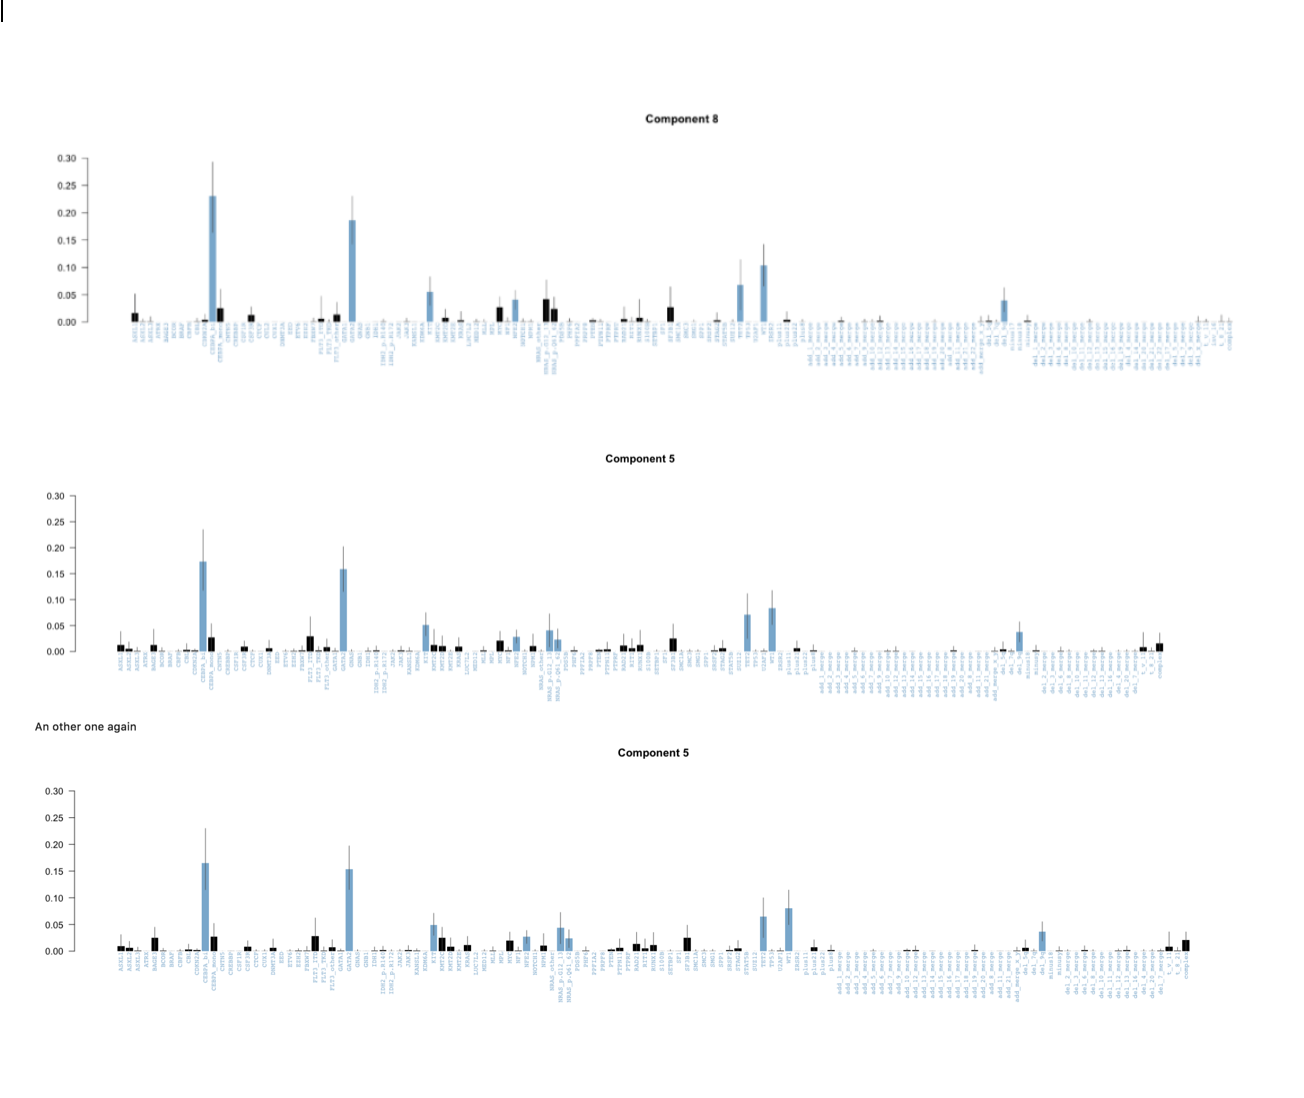

In [254]:
display_png(file="/Users/taziy/Desktop/component8.png")  

#### What we can deduce have concluded from this comparison ( 6 clusters with patients from component 1,3,4,8,10 vs 10 clusters) is that the initital clustering seems to be very stable because even when we reduce patients from other clusters, when we rerun a new clustering analysis , we find that the clusters initially found are stable.
#### There is also component 10 that seems to belong now to component 5 but I think it might be interesting to separate it as it is done in the original analysis since it is a special case activating only the genetical features (KMT2C and BAGE3) highly correlated with CML which is another type of leukemia.

## II) 10 components compared with 9 components

In [243]:
df_10_component <- cbind(df_final, dd_predicted_10_components)

In [244]:
df_10_component$predicted_9_component <- dd_predicted_9_components$predicted_component
dim(df_10_component)

[1] 2150  156

In [245]:
df_6_component_bis <- df_10_component[df_10_component$predicted_component == 1 | df_10_component$predicted_component == 3 | df_10_component$predicted_component == 4 | df_10_component$predicted_component == 8 | df_10_component$predicted_component == 10,]
df_6_component_bis$predicted_old_component <- df_6_component_bis$predicted_9_component
df_6_component_bis <- df_6_component_bis['predicted_old_component']


In [246]:
tmp_bis <- cbind(df_6_component_bis, dd_predicted_6_components['predicted_component'])

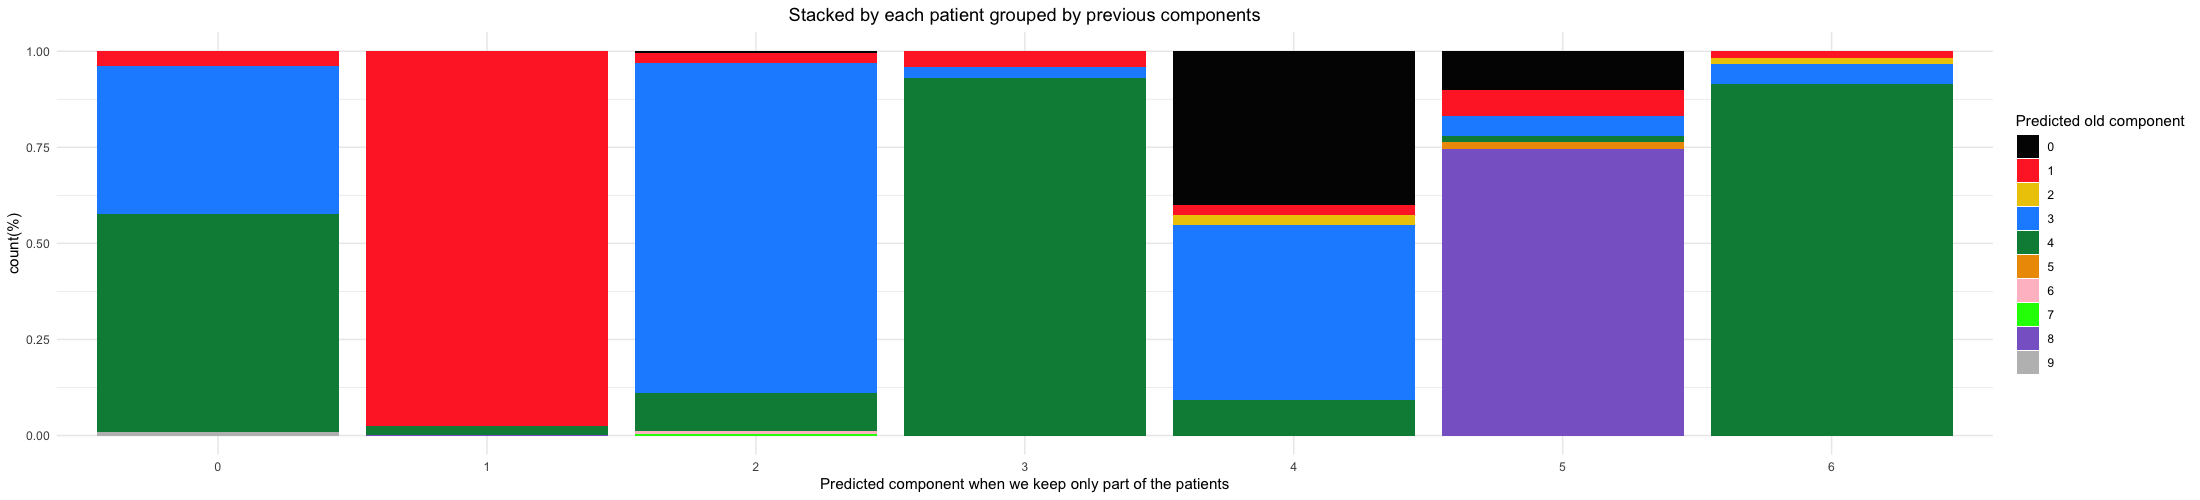

In [247]:
ggplot(tmp_bis, aes(factor(tmp$predicted_component),fill = tmp_bis$predicted_old_component,,order=predicted_old_component)) +
geom_bar(stat="count", position = "fill") + 
scale_fill_manual(values=c("gray1","firebrick1","gold2","dodgerblue","springgreen4","orange2","pink","green","mediumpurple3","grey"))+
labs(x = "Predicted component when we keep only part of the patients",title="Stacked by each patient grouped by previous components",fill="Predicted old component",y="count(%)")+
theme(plot.title = element_text(hjust = 0.5))

## III) Let's look at the count of features per component

In [304]:
df_10_component <- cbind(df_final, dd_predicted_10_components['predicted_component'])
df_10_component <- as.data.frame(sapply(df_10_component, as.numeric))
categories_repartition <- data.frame(category = colnames(df_10_component[1:(length(df_10_component)-1)]))
for (i in 0:10)
    categories_repartition[sprintf('component_%d', i)] <- apply(categories_repartition, 1, function(s) sum(df_10_component[df_10_component$predicted_component == i, s['category']]))
categories_repartition['total_count'] <- rowSums(categories_repartition[,-1])
categories_repartition <- categories_repartition[order(categories_repartition$total_count, decreasing = TRUE),]
head(categories_repartition,50)                                                                

category      component_0 component_1 component_2 component_3 component_4
52  NPM1          0           667           1           8           2        
20  DNMT3A        0           371          24          51         126        
25  FLT3_ITD      0           405           7          18          84        
79  TET2          0           175          18         131          42        
142 complex       0            10         211           8           7        
66  RUNX1         0            12          14         164         113        
75  SRSF2         0            70           7         189          30        
54  NRAS_p.G12_13 0           114           8          75          17        
33  IDH2_p.R140   0           148           9          61          19        
87  plus8         0            17          51          61          27        
26  FLT3_TKD      0           132           2          12          20        
61  PTPN11        0           111           6          27          12        
80  TP53          0             6         153           5           4        
1   ASXL1         0            10           5         118          23        
32  IDH1          0            80           7          27          28        
82  WT1           0            86           3           6          14        
76  STAG2         0            19           2          83          24        
136 del_7_merge   0             1          68          49           1        
46  MLL           0             2           5          19          95        
43  KRAS          0            30           6          44           9        
12  CEBPA_mono    0            58           1          34           3        
81  U2AF1         0             2           8          21          72        
141 t_8_21        0             1           1           1           0        
6   BCOR          0             5           2          34          55        
111 del_5q        0             4          86           1           1        
27  FLT3_other    0            59           1           3          19        
140 inv_16        0             0           1           0           0        
23  EZH2          0            11           8          45          11        
39  KIT           0             7           4           6           3        
29  GATA2         0            27           1          21           1        
55  NRAS_p.Q61_62 0             6           9          10          16        
64  RAD21         0            62           4           2           2        
49  NF1           0            19          12          18          10        
116 minusy        0             8          20           5           2        
114 minus17       0             0          71           0           0        
70  SF3B1         0            13           3          10          28        
57  PHF6          0             7           5          20          30        
112 del_7q        0             0          24           8          19        
139 t_v_11        0            11          13           4           1        
85  plus21        0             6          13          23           2        
34  IDH2_p.R172   0             1           1           0          55        
124 del_12_merge  0             1          51           1           6        
131 del_20_merge  0             2          38           5          14        
135 del_5_merge   0             0          57           0           0        
115 minus18       0             1          54           0           0        
71  SMC1A         0            33           2          11           1        
11  CEBPA_bi      0             7           1           8           0        
113 del_9q        0             6           9           3           1        
127 del_16_merge  0             0          47           1           1        
72  SMC3          0            35           1           0           8        
    component_5 component_